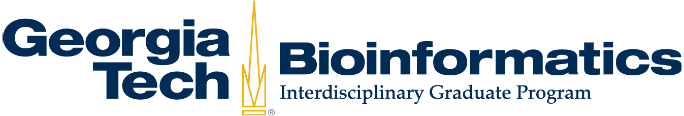

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>Project 5 and 6: <i>A reproducible guide to RNA-seq and differential gene expression analysis</i></h3>
    <h4>Deadline: 11:59PM, December 4th, 2023</h4>
    <h4>Total Points: 600</h4>
    
</div>

<div class="alert alert-block alert-danger">
    <h3>Alert!</h3>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

<div class="alert alert-block alert-info">
    <h2>Before you start, please read the following points carefully:</h2>
    <p>1. The objective of this project is to create a reproducible guide for RNA-seq data analysis followed by diffrential gene expression.</p>
    <p>2. This end goal of this notebook is to find up-and-down regulated transcripts between cases and controls, as defined by a randomized controlled trial. (This could be a disease-normal, drug-placebo, or high-low dose comparison)</p>
    <p>3. The n (cases + control samples) can be as low as 16 (eg: 8 cases and 8 controls) and can go up to 50</p>
    <p>4. RNA-seq analysis can be performed using Salmon, Kallisto, or Star (other tools exist, but we'll restrict to these three)</p>
    <p>5. <b>Using RStudio on Pace-ICE:</b> Please feel free to to use RStudio for diffrential gene expression analysis part of this project. Diffrential gene expression analysis can be performed using DESeq2, Sleuth, or EdgeR. DESeq2 is available in Python & R, meanwhile other tools might need to be installed during the R-Studio session on pace-ice. </p>
    <p>6. We will accept one R script file (in addition to this notebook) for this project's submission. Please make sure the RScript is well commented. It is up to you how you want structure this guide!</p>
    <hr>
    <p><b>Finally:</b> This is a much more open ended project compared to the last 4 ones. You will pick the data yourself and evaluate the findings. Please explain whatever work you have done <u>in as much detail as possible</u>. All commands and comments are essential. 
        
<p><b>Think:</b> as if your notebook will be used by another MS student who has very little idea about RNA-seq & diffrential gene expression analyses.</p>
</div>

---

# **1. Finding the right data**
### *Total Questions: 3*
### *Total Points: 60+20+20 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Locate samples for RNA-seq data analysis</h3>
    <p>SRA is a great resource to start with. Search for a disease or drug of interest, use appropriate filters and locate RNA-seq data files that are publically available. Ideally, stick to one SRA project and make sure the RNA-seq files are coming from a regular NGS run (they should be fastq files) </p> 
    
    
    
<p>Explain what experiment the data is coming from, how many cases/controls etc.</p>
</div>

In [3]:
### Add cells for commands, comments and important points to keep in mind.

We want to study Huntington Disease by comparing gene expression in normal and affected samples using RNAseq. We found relevant data in Sequence Read Archives (SRA), a database of sequencing information. This data will help us understand the molecular differences between healthy and diseased states. Our focus is on identifying key genes or pathways associated with Huntington Disease, using RNAseq analysis.
Link: https://www.ncbi.nlm.nih.gov/sra/SRX17694572[accn] 
Accession#: PRJNA883962

There are 48 samples associated with Huntington Disease, each identified by a unique SRR ID. The study accession
number is SRP399433. Researchers often use SRR IDs to uniquely label and reference individual sequencing runs within a study.
By navigating to the link (https://www.ncbi.nlm.nih.gov/Traces/study/?acc=SRP399433&o=acc_s%3Aa), we can access detailed
information about these 48 samples, potentially including metadata, experimental conditions, and raw sequencing data. 

<div class="alert alert-block alert-warning">
    <h3>1.2 Download the data</h3>
    <p>Figure out how and where you will save these data files. Write the commands and show the final downloaded files using <i>ls -lh</i></p>
</div>

In [1]:
### Add cells for commands, comments and important points to keep in mind.
!prefetch --help
#prefetch is a tool that helps in downloading to a directory named by accession number

Usage:
  prefetch [options] <SRA accession> [...]
  Download SRA files and their dependencies

  prefetch [options] --cart <kart file>
  Download cart file

  prefetch [options] <URL> --output-file <FILE>
  Download URL to FILE

  prefetch [options] <URL> [...] --output-directory <DIRECTORY>
  Download URL or URL-s to DIRECTORY

  prefetch [options] <SRA file> [...]
  Check SRA file for missed dependencies and download them


Options:
  -T|--type <value>                Specify file type to download. Default: sra 
  -t|--transport <http|fasp|both>  Transport: one of: fasp; http; both 
                                   [default]. (fasp only; http only; first try 
                                   fasp (ascp), use http if cannot download 
                                   using fasp). 
  --location <value>               Location of data. 

  -N|--min-size <size>             Minimum file size to download in KB 
                                   (inclusive). 
  -X|--max-size <size>     

In [2]:
!fasterq-dump
#fasterq-dump is a tool designed for efficiently converting large-scale SRA objects into FASTQ files.
#It stands out for its speed, thanks to its support for multi-threading and optimized bulk joins that enhance 
#overall performance during the conversion process.


Usage:
  fasterq-dump <path> [options]
  fasterq-dump <accession> [options]

Options:
  -F|--format                      format (special, fastq, default=fastq) 
  -o|--outfile                     output-file 
  -O|--outdir                      output-dir 
  -b|--bufsize                     size of file-buffer dflt=1MB 
  -c|--curcache                    size of cursor-cache dflt=10MB 
  -m|--mem                         memory limit for sorting dflt=100MB 
  -t|--temp                        where to put temp. files dflt=curr dir 
  -e|--threads                     how many thread dflt=6 
  -p|--progress                    show progress 
  -x|--details                     print details 
  -s|--split-spot                  split spots into reads 
  -S|--split-files                 write reads into different files 
  -3|--split-3                     writes single reads in special file 
  --concatenate-reads              writes whole spots into one file 
  -Z|--stdout                      p

In [1]:
#we are downloading the 16 samples.
import subprocess
import os

srrlists = ['SRR21696962', 'SRR21696963', 'SRR21696964', 'SRR21696965', 'SRR21696966', 'SRR21696967', 'SRR21696968', 'SRR21696969', 'SRR21696971', 'SRR21696972', 'SRR21696973', 'SRR21696974', 'SRR21696975', 'SRR21696976', 'SRR21696977', 'SRR21696981']

main_directory = "RNAseq"
os.makedirs(main_directory, exist_ok=True)

for srrlist in srrlists:
    sample_directory = os.path.join(main_directory, srrlist)
    os.makedirs(sample_directory, exist_ok=True)

    subprocess.run(["prefetch", srrlist])
    subprocess.run(["fastq-dump", "--outdir", sample_directory, "--split-files", srrlist])

2023-12-02T20:59:53 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T20:59:53 prefetch.3.0.8: 1) Downloading 'SRR21696962'...
2023-12-02T20:59:53 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T20:59:53 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T21:02:21 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T21:02:33 prefetch.3.0.8:  'SRR21696962' is valid
2023-12-02T21:02:33 prefetch.3.0.8: 1) 'SRR21696962' was downloaded successfully
2023-12-02T21:02:33 prefetch.3.0.8: 'SRR21696962' has 0 unresolved dependencies


Read 67856494 spots for SRR21696962
Written 67856494 spots for SRR21696962



2023-12-02T21:09:50 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T21:09:50 prefetch.3.0.8: 1) Downloading 'SRR21696963'...
2023-12-02T21:09:50 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T21:09:50 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T21:11:56 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T21:12:06 prefetch.3.0.8:  'SRR21696963' is valid
2023-12-02T21:12:06 prefetch.3.0.8: 1) 'SRR21696963' was downloaded successfully
2023-12-02T21:12:06 prefetch.3.0.8: 'SRR21696963' has 0 unresolved dependencies


Read 55916356 spots for SRR21696963
Written 55916356 spots for SRR21696963



2023-12-02T21:18:15 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T21:18:15 prefetch.3.0.8: 1) Downloading 'SRR21696964'...
2023-12-02T21:18:15 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T21:18:15 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T21:19:18 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T21:19:23 prefetch.3.0.8:  'SRR21696964' is valid
2023-12-02T21:19:23 prefetch.3.0.8: 1) 'SRR21696964' was downloaded successfully
2023-12-02T21:19:23 prefetch.3.0.8: 'SRR21696964' has 0 unresolved dependencies


Read 28658614 spots for SRR21696964
Written 28658614 spots for SRR21696964



2023-12-02T21:22:39 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T21:22:39 prefetch.3.0.8: 1) Downloading 'SRR21696965'...
2023-12-02T21:22:39 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T21:22:39 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T21:24:23 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T21:24:31 prefetch.3.0.8:  'SRR21696965' is valid
2023-12-02T21:24:31 prefetch.3.0.8: 1) 'SRR21696965' was downloaded successfully
2023-12-02T21:24:31 prefetch.3.0.8: 'SRR21696965' has 0 unresolved dependencies


Read 43078168 spots for SRR21696965
Written 43078168 spots for SRR21696965



2023-12-02T21:29:30 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T21:29:31 prefetch.3.0.8: 1) Downloading 'SRR21696966'...
2023-12-02T21:29:31 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T21:29:31 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T21:31:07 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T21:31:11 prefetch.3.0.8:  'SRR21696966' is valid
2023-12-02T21:31:11 prefetch.3.0.8: 1) 'SRR21696966' was downloaded successfully
2023-12-02T21:31:11 prefetch.3.0.8: 'SRR21696966' has 0 unresolved dependencies


Read 25508993 spots for SRR21696966
Written 25508993 spots for SRR21696966



2023-12-02T21:34:17 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T21:34:17 prefetch.3.0.8: 1) Downloading 'SRR21696967'...
2023-12-02T21:34:17 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T21:34:17 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T21:35:13 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T21:35:16 prefetch.3.0.8:  'SRR21696967' is valid
2023-12-02T21:35:16 prefetch.3.0.8: 1) 'SRR21696967' was downloaded successfully
2023-12-02T21:35:16 prefetch.3.0.8: 'SRR21696967' has 0 unresolved dependencies


Read 19399275 spots for SRR21696967
Written 19399275 spots for SRR21696967



2023-12-02T21:37:33 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T21:37:33 prefetch.3.0.8: 1) Downloading 'SRR21696968'...
2023-12-02T21:37:33 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T21:37:33 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T21:38:33 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T21:38:38 prefetch.3.0.8:  'SRR21696968' is valid
2023-12-02T21:38:38 prefetch.3.0.8: 1) 'SRR21696968' was downloaded successfully
2023-12-02T21:38:38 prefetch.3.0.8: 'SRR21696968' has 0 unresolved dependencies


Read 27089675 spots for SRR21696968
Written 27089675 spots for SRR21696968



2023-12-02T21:41:47 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T21:41:47 prefetch.3.0.8: 1) Downloading 'SRR21696969'...
2023-12-02T21:41:47 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T21:41:47 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T21:42:39 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T21:42:44 prefetch.3.0.8:  'SRR21696969' is valid
2023-12-02T21:42:44 prefetch.3.0.8: 1) 'SRR21696969' was downloaded successfully
2023-12-02T21:42:44 prefetch.3.0.8: 'SRR21696969' has 0 unresolved dependencies


Read 25025386 spots for SRR21696969
Written 25025386 spots for SRR21696969



2023-12-02T21:45:56 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T21:45:56 prefetch.3.0.8: 1) Downloading 'SRR21696971'...
2023-12-02T21:45:56 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T21:45:56 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T21:46:40 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T21:46:44 prefetch.3.0.8:  'SRR21696971' is valid
2023-12-02T21:46:44 prefetch.3.0.8: 1) 'SRR21696971' was downloaded successfully
2023-12-02T21:46:44 prefetch.3.0.8: 'SRR21696971' has 0 unresolved dependencies


Read 22825379 spots for SRR21696971
Written 22825379 spots for SRR21696971



2023-12-02T21:49:48 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T21:49:48 prefetch.3.0.8: 1) Downloading 'SRR21696972'...
2023-12-02T21:49:48 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T21:49:48 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T21:51:23 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T21:51:35 prefetch.3.0.8:  'SRR21696972' is valid
2023-12-02T21:51:35 prefetch.3.0.8: 1) 'SRR21696972' was downloaded successfully
2023-12-02T21:51:35 prefetch.3.0.8: 'SRR21696972' has 0 unresolved dependencies


Read 49176271 spots for SRR21696972
Written 49176271 spots for SRR21696972



2023-12-02T21:57:59 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T21:57:59 prefetch.3.0.8: 1) Downloading 'SRR21696973'...
2023-12-02T21:57:59 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T21:57:59 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T21:59:27 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T21:59:34 prefetch.3.0.8:  'SRR21696973' is valid
2023-12-02T21:59:34 prefetch.3.0.8: 1) 'SRR21696973' was downloaded successfully
2023-12-02T21:59:34 prefetch.3.0.8: 'SRR21696973' has 0 unresolved dependencies


Read 38354804 spots for SRR21696973
Written 38354804 spots for SRR21696973



2023-12-02T22:04:39 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T22:04:39 prefetch.3.0.8: 1) Downloading 'SRR21696974'...
2023-12-02T22:04:39 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T22:04:39 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T22:06:36 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T22:06:46 prefetch.3.0.8:  'SRR21696974' is valid
2023-12-02T22:06:46 prefetch.3.0.8: 1) 'SRR21696974' was downloaded successfully
2023-12-02T22:06:46 prefetch.3.0.8: 'SRR21696974' has 0 unresolved dependencies


Read 37854645 spots for SRR21696974
Written 37854645 spots for SRR21696974



2023-12-02T22:11:41 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T22:11:42 prefetch.3.0.8: 1) Downloading 'SRR21696975'...
2023-12-02T22:11:42 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T22:11:42 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T22:12:12 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T22:12:14 prefetch.3.0.8:  'SRR21696975' is valid
2023-12-02T22:12:14 prefetch.3.0.8: 1) 'SRR21696975' was downloaded successfully
2023-12-02T22:12:14 prefetch.3.0.8: 'SRR21696975' has 0 unresolved dependencies


Read 12157782 spots for SRR21696975
Written 12157782 spots for SRR21696975



2023-12-02T22:13:52 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T22:13:52 prefetch.3.0.8: 1) Downloading 'SRR21696976'...
2023-12-02T22:13:52 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T22:13:52 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T22:15:05 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T22:15:11 prefetch.3.0.8:  'SRR21696976' is valid
2023-12-02T22:15:11 prefetch.3.0.8: 1) 'SRR21696976' was downloaded successfully
2023-12-02T22:15:11 prefetch.3.0.8: 'SRR21696976' has 0 unresolved dependencies


Read 35051699 spots for SRR21696976
Written 35051699 spots for SRR21696976



2023-12-02T22:19:51 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T22:19:51 prefetch.3.0.8: 1) Downloading 'SRR21696977'...
2023-12-02T22:19:51 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T22:19:51 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T22:20:48 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T22:20:53 prefetch.3.0.8:  'SRR21696977' is valid
2023-12-02T22:20:53 prefetch.3.0.8: 1) 'SRR21696977' was downloaded successfully
2023-12-02T22:20:53 prefetch.3.0.8: 'SRR21696977' has 0 unresolved dependencies


Read 27425542 spots for SRR21696977
Written 27425542 spots for SRR21696977



2023-12-02T22:24:32 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-12-02T22:24:32 prefetch.3.0.8: 1) Downloading 'SRR21696981'...
2023-12-02T22:24:32 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-12-02T22:24:32 prefetch.3.0.8:  Downloading via HTTPS...
2023-12-02T22:25:19 prefetch.3.0.8:  HTTPS download succeed
2023-12-02T22:25:24 prefetch.3.0.8:  'SRR21696981' is valid
2023-12-02T22:25:24 prefetch.3.0.8: 1) 'SRR21696981' was downloaded successfully
2023-12-02T22:25:24 prefetch.3.0.8: 'SRR21696981' has 0 unresolved dependencies


Read 23900286 spots for SRR21696981
Written 23900286 spots for SRR21696981


In [2]:
# We have copied all the SRR fastq files to one merged foler.
# Copy all FastQ files to the new folder "fastqfiles"
!cp "$root_dir"/*/*.fastq "$output_dir"

Out of 48 samples, we have taken 16 samples of interest as mentioned.

<div class="alert alert-block alert-warning">
    <h3>1.3 Talk about the RNA-seq files</h3>
    <p>Summarize the study from which you have extracted the RNA-seq data files. Are there any genes/transcripts you expect to find up-or-down regulated?</p>
</div>

In [4]:
### Add cells for commands, comments and important points to keep in mind.

Huntington's disease (HD) is a neurodegenerative condition inherited dominantly, resulting from the expansion of CAG trinucleotide repeats in exon 1 of the huntingtin (HTT) gene. This genetic mutation leads to the development of the disease, which progressively affects the nervous system.

From the extracted RNA-seq data files: the transcriptome-wide RNA sequencing analysis was done by DESeq2 package, identifying 988 differentially expressed genes (DEGs) in Huntington's disease (HD) neuronal lines compared to controls. The analysis reveals enrichment in gene ontology terms related to neurodegenerative disorders. 

Using a Cas13d-based gene therapy (Cas13d–CAGEX), the study shows a partial reversal of HD-associated DEGs, indicating efficacy in alleviating downstream effects of mutant huntingtin. 

# **2. Quality control**
### *Total Questions: 2*
### *Total Points: 50+50 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Pre-QC</h3>
    <p>Run the tools of your choice to summarize the read quality contained in your fastq files. Contrary to last time, you now have multiple fastq files (minimum 15 pairs). Sometimes results from QC tools are also summarized in simple text files which can be read using a simple piece of code and summarized using graphs in python.</p>
</div>

In [14]:
### Add cells for commands, comments and important points to keep in mind.

In [ ]:
# Creating the directories for FASTQC results.
!mkdir -p ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCBeforeTrimming
!mkdir -p ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/Trimming
!mkdir -p ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCAfterTrimming

In [ ]:
#using the fastqc tool to perform the pre-QC steps 
#Running QC on our fastq files
!fastqc -o ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCBeforeTrimming ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastqfiles/*

null
null
Started analysis of SRR21696962_1.fastq
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
Approx 5% complete for SRR21696962_1.fastq
Approx 10% complete for SRR21696962_1.fastq
Approx 15% complete for SRR21696962_1.fastq
Approx 20% complete for SRR21696962_1.fastq
Approx 25% complete for SRR21696962_1.fastq
Approx 30% complete for SRR21696962_1.fastq
Approx 35% complete for SRR21696962_1.fastq
Approx 40% complete for SRR21696962_1.fastq
Approx 45% complete for SRR21696962_1.fastq
Approx 50% complete for SRR21696962_1.fastq
Approx 55% complete for SRR21696962_1.fastq
Approx 60% complete for SRR21696962_1.fastq
Approx 65% complete for SRR21696962_1.fastq
Approx 70% complete for SRR21696962_1.fastq
Approx 75% complete for SRR21696962_1.fastq
Approx 80% complete for SRR21696962_1.fastq
Approx 85% complete for SRR21696962_1.fastq
Approx 90% complete for SRR21696962_1.fastq
Approx 95

Approx 80% complete for SRR21696966_1.fastq
Approx 85% complete for SRR21696966_1.fastq
Approx 90% complete for SRR21696966_1.fastq
Approx 95% complete for SRR21696966_1.fastq
Analysis complete for SRR21696966_1.fastq
Started analysis of SRR21696966_2.fastq
Approx 5% complete for SRR21696966_2.fastq
Approx 10% complete for SRR21696966_2.fastq
Approx 15% complete for SRR21696966_2.fastq
Approx 20% complete for SRR21696966_2.fastq
Approx 25% complete for SRR21696966_2.fastq
Approx 30% complete for SRR21696966_2.fastq
Approx 35% complete for SRR21696966_2.fastq
Approx 40% complete for SRR21696966_2.fastq
Approx 45% complete for SRR21696966_2.fastq
Approx 50% complete for SRR21696966_2.fastq
Approx 55% complete for SRR21696966_2.fastq
Approx 60% complete for SRR21696966_2.fastq
Approx 65% complete for SRR21696966_2.fastq
Approx 70% complete for SRR21696966_2.fastq
Approx 75% complete for SRR21696966_2.fastq


In [1]:
#Here we have used MultiQC tool as it designs to aggregate and summarize results from multiple FastQC files. 
!multiqc ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCBeforeTrimming


  /// ]8;id=231792;https://multiqc.info\MultiQC]8;;\ 🔍 | v1.18

|           multiqc | Search path : /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCBeforeTrimming
|         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 64/64  0m  
|            fastqc | Found 32 reports
|           multiqc | Report      : multiqc_report.html
|           multiqc | Data        : multiqc_data
|           multiqc | MultiQC complete


In [2]:
#the list of multiqc_data
!ls -lh multiqc_data

total 2.5M
-rw-r--r-- 1 hpatil39 gtperson   62 Dec  2 21:06 multiqc_citations.txt
-rw-r--r-- 1 hpatil39 gtperson 2.4M Dec  2 21:06 multiqc_data.json
-rw-r--r-- 1 hpatil39 gtperson 6.7K Dec  2 21:06 multiqc_fastqc.txt
-rw-r--r-- 1 hpatil39 gtperson 2.7K Dec  2 21:06 multiqc_general_stats.txt
-rw-r--r-- 1 hpatil39 gtperson 4.4K Dec  2 21:06 multiqc.log
-rw-r--r-- 1 hpatil39 gtperson   28 Dec  2 21:06 multiqc_software_versions.txt
-rw-r--r-- 1 hpatil39 gtperson 4.9K Dec  2 21:06 multiqc_sources.txt


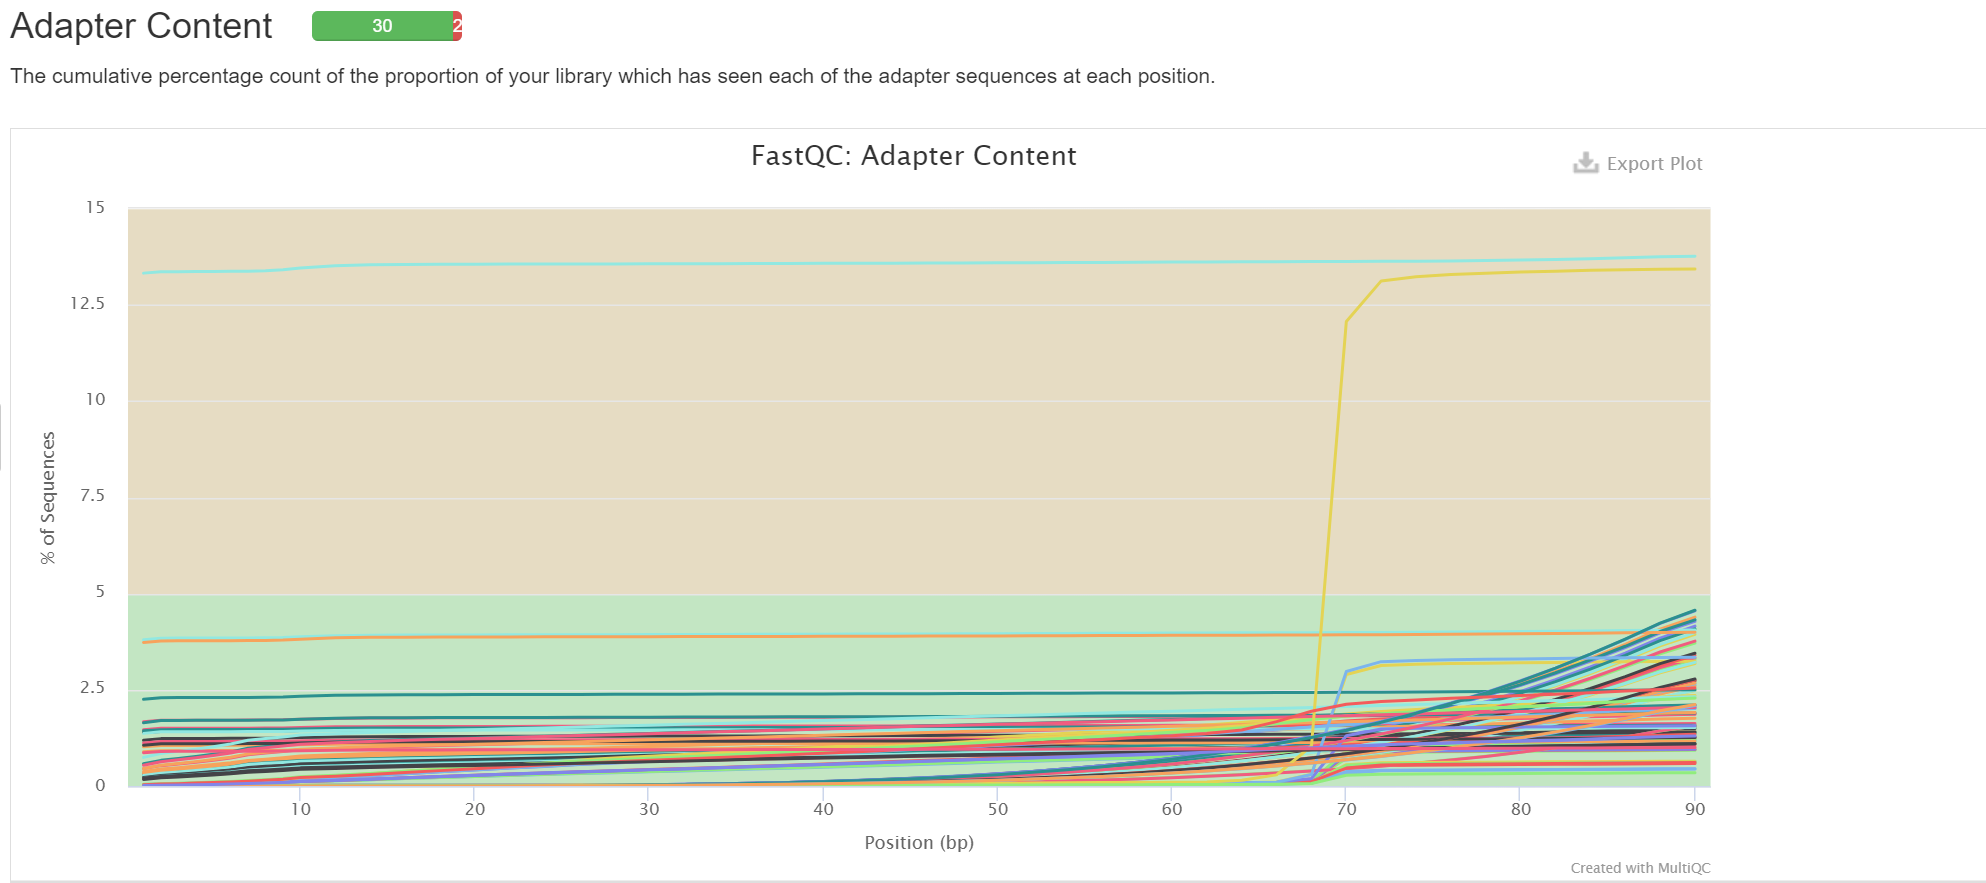

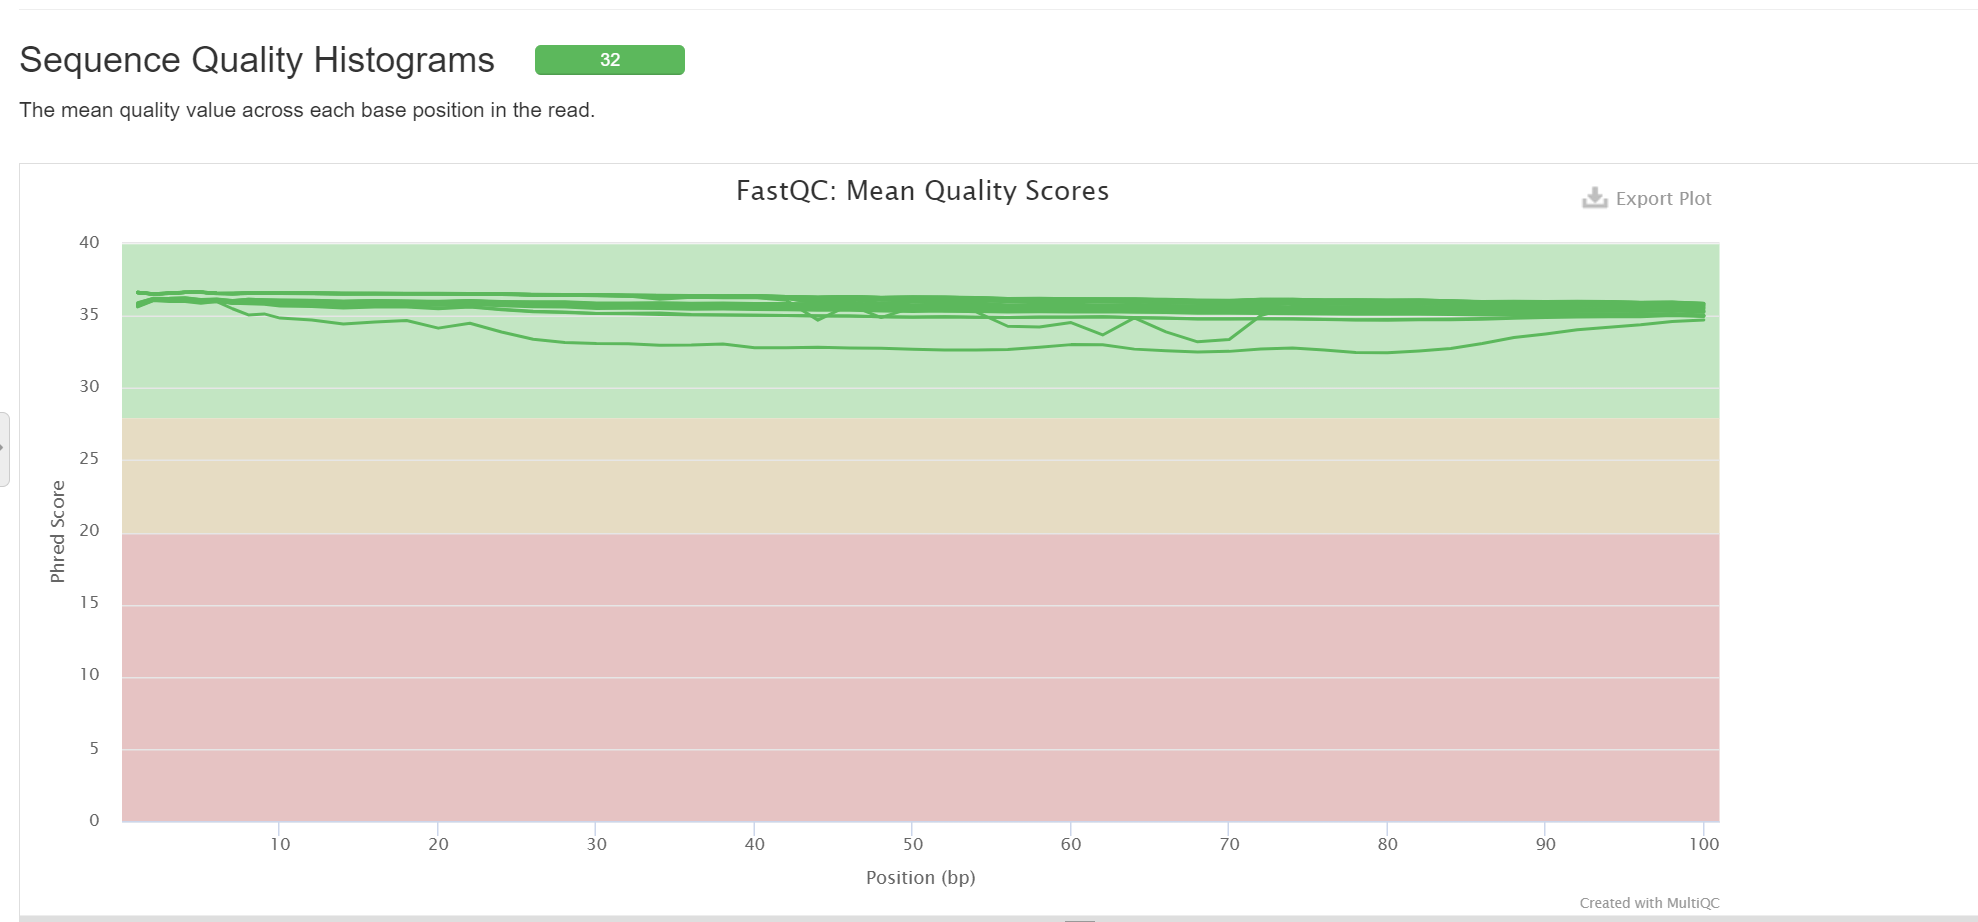

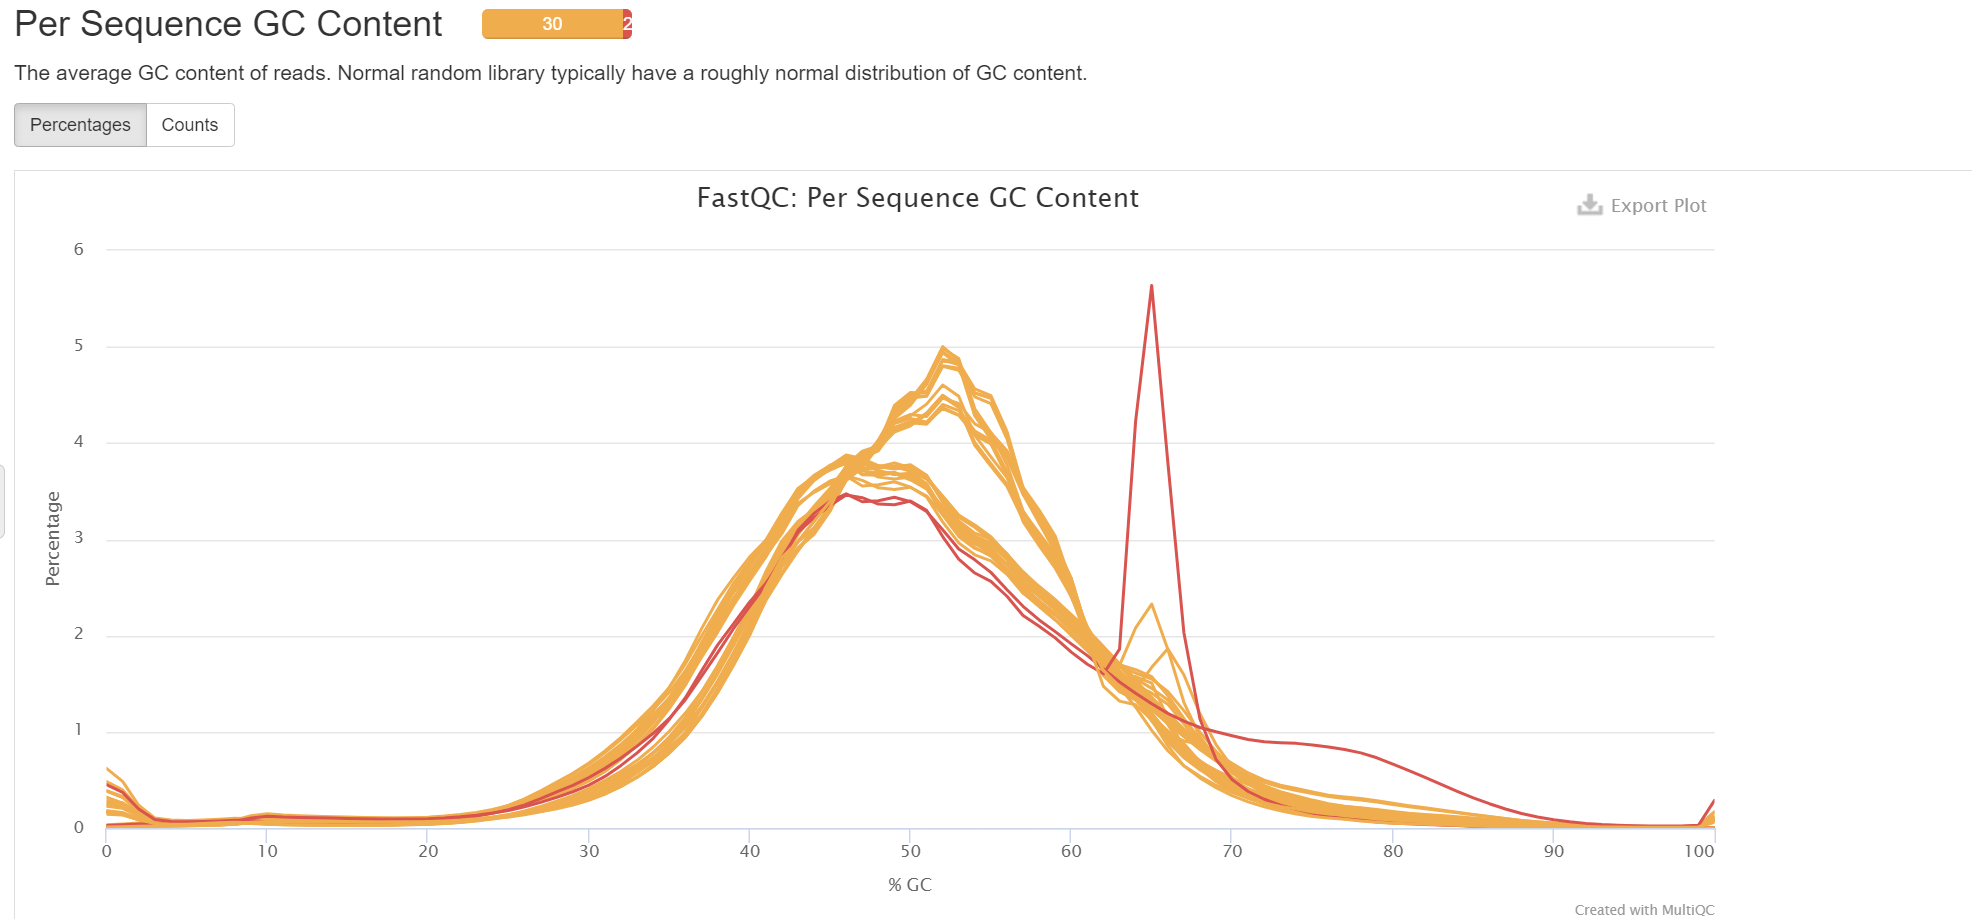

<div class="alert alert-block alert-warning">
    <h3>2.2 Post-QC</h3>
    <p>How and what did you trim/prune? Show your commands of the tools used and summarize the final fastq files.</p>
</div>

In [15]:
### Add cells for commands, comments and important points to keep in mind.

In [11]:
#here we are trimming the 16 samples.
srrlists = ['SRR21696962', 'SRR21696963', 'SRR21696964', 'SRR21696965', 'SRR21696966', 'SRR21696967', 'SRR21696968', 'SRR21696969', 'SRR21696971', 'SRR21696972', 'SRR21696973', 'SRR21696974', 'SRR21696975', 'SRR21696976', 'SRR21696977', 'SRR21696981']
for srrid in srrlists:
    !fastp -i ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastqfiles/{srrid}_1.fastq -I ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastqfiles/{srrid}_2.fastq -o ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/Trimming/{srrid}_1.Trimmed.fastq -O ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/Trimming/{srrid}_2.Trimmed.fastq -f 12 -t 15 

Read1 before filtering:
total reads: 67856494
total bases: 6853505894
Q20 bases: 6730462665(98.2047%)
Q30 bases: 6537080240(95.383%)

Read2 before filtering:
total reads: 67856494
total bases: 6853505894
Q20 bases: 6615515984(96.5275%)
Q30 bases: 6341171126(92.5245%)

Read1 after filtering:
total reads: 65747277
total bases: 4838278301
Q20 bases: 4773801179(98.6674%)
Q30 bases: 4644492101(95.9947%)

Read2 after filtering:
total reads: 65747277
total bases: 4838278301
Q20 bases: 4751298426(98.2023%)
Q30 bases: 4581456217(94.6919%)

Filtering result:
reads passed filter: 131494554
reads failed due to low quality: 4203578
reads failed due to too many N: 14856
reads failed due to too short: 0
reads with adapter trimmed: 8318132
bases trimmed due to adapters: 54383536

Duplication rate: 44.0143%

Insert size peak (evaluated by paired-end reads): 98

JSON report: fastp.json
HTML report: fastp.html

fastp -i /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastqfiles

Read1 before filtering:
total reads: 27089675
total bases: 2736057175
Q20 bases: 2687229185(98.2154%)
Q30 bases: 2608298731(95.3306%)

Read2 before filtering:
total reads: 27089675
total bases: 2736057175
Q20 bases: 2631106214(96.1642%)
Q30 bases: 2514259327(91.8935%)

Read1 after filtering:
total reads: 26157762
total bases: 1929488434
Q20 bases: 1902718839(98.6126%)
Q30 bases: 1850125816(95.8869%)

Read2 after filtering:
total reads: 26157762
total bases: 1929488434
Q20 bases: 1890214738(97.9646%)
Q30 bases: 1817653513(94.2039%)

Filtering result:
reads passed filter: 52315524
reads failed due to low quality: 1857908
reads failed due to too many N: 5918
reads failed due to too short: 0
reads with adapter trimmed: 2021558
bases trimmed due to adapters: 12507640

Duplication rate: 25.0432%

Insert size peak (evaluated by paired-end reads): 98

JSON report: fastp.json
HTML report: fastp.html

fastp -i /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastqfiles/

Read1 before filtering:
total reads: 12157782
total bases: 1227935982
Q20 bases: 1201174274(97.8206%)
Q30 bases: 1163329621(94.7386%)

Read2 before filtering:
total reads: 12157782
total bases: 1227935982
Q20 bases: 1175643670(95.7414%)
Q30 bases: 1125064073(91.6224%)

Read1 after filtering:
total reads: 11619109
total bases: 855672960
Q20 bases: 842454720(98.4552%)
Q30 bases: 817885756(95.5839%)

Read2 after filtering:
total reads: 11619109
total bases: 855672960
Q20 bases: 839302843(98.0869%)
Q30 bases: 809693006(94.6265%)

Filtering result:
reads passed filter: 23238218
reads failed due to low quality: 1074802
reads failed due to too many N: 2544
reads failed due to too short: 0
reads with adapter trimmed: 1325056
bases trimmed due to adapters: 8363028

Duplication rate: 20.0638%

Insert size peak (evaluated by paired-end reads): 98

JSON report: fastp.json
HTML report: fastp.html

fastp -i /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastqfiles/SRR2169

In [12]:
#Running PostQC from the trimmed fastq files.
!fastqc -o ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCAfterTrimming ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/Trimming/*

null
null
Started analysis of SRR21696962_1.Trimmed.fastq
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
null
Approx 5% complete for SRR21696962_1.Trimmed.fastq
Approx 10% complete for SRR21696962_1.Trimmed.fastq
Approx 15% complete for SRR21696962_1.Trimmed.fastq
Approx 20% complete for SRR21696962_1.Trimmed.fastq
Approx 25% complete for SRR21696962_1.Trimmed.fastq
Approx 30% complete for SRR21696962_1.Trimmed.fastq
Approx 35% complete for SRR21696962_1.Trimmed.fastq
Approx 40% complete for SRR21696962_1.Trimmed.fastq
Approx 45% complete for SRR21696962_1.Trimmed.fastq
Approx 50% complete for SRR21696962_1.Trimmed.fastq
Approx 55% complete for SRR21696962_1.Trimmed.fastq
Approx 60% complete for SRR21696962_1.Trimmed.fastq
Approx 65% complete for SRR21696962_1.Trimmed.fastq
Approx 70% complete for SRR21696962_1.Trimmed.fastq
Approx 75% complete for SRR21696962_1.Trimmed.fastq
Approx 80% co

Approx 45% complete for SRR21696965_2.Trimmed.fastq
Approx 50% complete for SRR21696965_2.Trimmed.fastq
Approx 55% complete for SRR21696965_2.Trimmed.fastq
Approx 60% complete for SRR21696965_2.Trimmed.fastq
Approx 65% complete for SRR21696965_2.Trimmed.fastq
Approx 70% complete for SRR21696965_2.Trimmed.fastq
Approx 75% complete for SRR21696965_2.Trimmed.fastq
Approx 80% complete for SRR21696965_2.Trimmed.fastq
Approx 85% complete for SRR21696965_2.Trimmed.fastq
Approx 90% complete for SRR21696965_2.Trimmed.fastq
Approx 95% complete for SRR21696965_2.Trimmed.fastq
Analysis complete for SRR21696965_2.Trimmed.fastq
Started analysis of SRR21696966_1.Trimmed.fastq
Approx 5% complete for SRR21696966_1.Trimmed.fastq
Approx 10% complete for SRR21696966_1.Trimmed.fastq
Approx 15% complete for SRR21696966_1.Trimmed.fastq
Approx 20% complete for SRR21696966_1.Trimmed.fastq
Approx 25% complete for SRR21696966_1.Trimmed.fastq
Approx 30% complete for SRR21696966_1.Trimmed.fastq
Approx 35% complete

Started analysis of SRR21696969_2.Trimmed.fastq
Approx 5% complete for SRR21696969_2.Trimmed.fastq
Approx 10% complete for SRR21696969_2.Trimmed.fastq
Approx 15% complete for SRR21696969_2.Trimmed.fastq
Approx 20% complete for SRR21696969_2.Trimmed.fastq
Approx 25% complete for SRR21696969_2.Trimmed.fastq
Approx 30% complete for SRR21696969_2.Trimmed.fastq
Approx 35% complete for SRR21696969_2.Trimmed.fastq
Approx 40% complete for SRR21696969_2.Trimmed.fastq
Approx 45% complete for SRR21696969_2.Trimmed.fastq
Approx 50% complete for SRR21696969_2.Trimmed.fastq
Approx 55% complete for SRR21696969_2.Trimmed.fastq
Approx 60% complete for SRR21696969_2.Trimmed.fastq
Approx 65% complete for SRR21696969_2.Trimmed.fastq
Approx 70% complete for SRR21696969_2.Trimmed.fastq
Approx 75% complete for SRR21696969_2.Trimmed.fastq
Approx 80% complete for SRR21696969_2.Trimmed.fastq
Approx 85% complete for SRR21696969_2.Trimmed.fastq
Approx 90% complete for SRR21696969_2.Trimmed.fastq
Approx 95% comple

Approx 60% complete for SRR21696974_1.Trimmed.fastq
Approx 65% complete for SRR21696974_1.Trimmed.fastq
Approx 70% complete for SRR21696974_1.Trimmed.fastq
Approx 75% complete for SRR21696974_1.Trimmed.fastq
Approx 80% complete for SRR21696974_1.Trimmed.fastq
Approx 85% complete for SRR21696974_1.Trimmed.fastq
Approx 90% complete for SRR21696974_1.Trimmed.fastq
Approx 95% complete for SRR21696974_1.Trimmed.fastq
Analysis complete for SRR21696974_1.Trimmed.fastq
Started analysis of SRR21696974_2.Trimmed.fastq
Approx 5% complete for SRR21696974_2.Trimmed.fastq
Approx 10% complete for SRR21696974_2.Trimmed.fastq
Approx 15% complete for SRR21696974_2.Trimmed.fastq
Approx 20% complete for SRR21696974_2.Trimmed.fastq
Approx 25% complete for SRR21696974_2.Trimmed.fastq
Approx 30% complete for SRR21696974_2.Trimmed.fastq
Approx 35% complete for SRR21696974_2.Trimmed.fastq
Approx 40% complete for SRR21696974_2.Trimmed.fastq
Approx 45% complete for SRR21696974_2.Trimmed.fastq
Approx 50% complete

Approx 35% complete for SRR21696981_2.Trimmed.fastq
Approx 40% complete for SRR21696981_2.Trimmed.fastq
Approx 45% complete for SRR21696981_2.Trimmed.fastq
Approx 50% complete for SRR21696981_2.Trimmed.fastq
Approx 55% complete for SRR21696981_2.Trimmed.fastq
Approx 60% complete for SRR21696981_2.Trimmed.fastq
Approx 65% complete for SRR21696981_2.Trimmed.fastq
Approx 70% complete for SRR21696981_2.Trimmed.fastq
Approx 75% complete for SRR21696981_2.Trimmed.fastq
Approx 80% complete for SRR21696981_2.Trimmed.fastq
Approx 85% complete for SRR21696981_2.Trimmed.fastq
Approx 90% complete for SRR21696981_2.Trimmed.fastq
Approx 95% complete for SRR21696981_2.Trimmed.fastq
Analysis complete for SRR21696981_2.Trimmed.fastq


In [13]:
!multiqc ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCAfterTrimming -o ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCAfterTrimming


  /// ]8;id=371037;https://multiqc.info\MultiQC]8;;\ 🔍 | v1.18

|           multiqc | Search path : /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCAfterTrimming
|         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 64/64  0m  
|            fastqc | Found 32 reports
|           multiqc | Report      : ../../../../../../home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCAfterTrimming/multiqc_report.html
|           multiqc | Data        : ../../../../../../home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCAfterTrimming/multiqc_data
|           multiqc | MultiQC complete


In [14]:
!ls -lh ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/fastQCAfterTrimming

total 67M
drwxr-xr-x 2 hpatil39 gtperson 4.0K Dec  3 01:04 multiqc_data
-rw-r--r-- 1 hpatil39 gtperson 1.8M Dec  3 01:04 multiqc_report.html
-rw-r--r-- 1 hpatil39 gtperson 691K Dec  2 23:18 SRR21696962_1.Trimmed_fastqc.html
-rw-r--r-- 1 hpatil39 gtperson 1.4M Dec  2 23:18 SRR21696962_1.Trimmed_fastqc.zip
-rw-r--r-- 1 hpatil39 gtperson 704K Dec  2 23:22 SRR21696962_2.Trimmed_fastqc.html
-rw-r--r-- 1 hpatil39 gtperson 1.4M Dec  2 23:22 SRR21696962_2.Trimmed_fastqc.zip
-rw-r--r-- 1 hpatil39 gtperson 688K Dec  2 23:26 SRR21696963_1.Trimmed_fastqc.html
-rw-r--r-- 1 hpatil39 gtperson 1.4M Dec  2 23:26 SRR21696963_1.Trimmed_fastqc.zip
-rw-r--r-- 1 hpatil39 gtperson 700K Dec  2 23:30 SRR21696963_2.Trimmed_fastqc.html
-rw-r--r-- 1 hpatil39 gtperson 1.4M Dec  2 23:30 SRR21696963_2.Trimmed_fastqc.zip
-rw-r--r-- 1 hpatil39 gtperson 692K Dec  2 23:32 SRR21696964_1.Trimmed_fastqc.html
-rw-r--r-- 1 hpatil39 gtperson 1.4M Dec  2 23:32 SRR21696964_1.Trimmed_fastqc.zip
-rw-r--r-- 1 hpatil39 gtperson 700

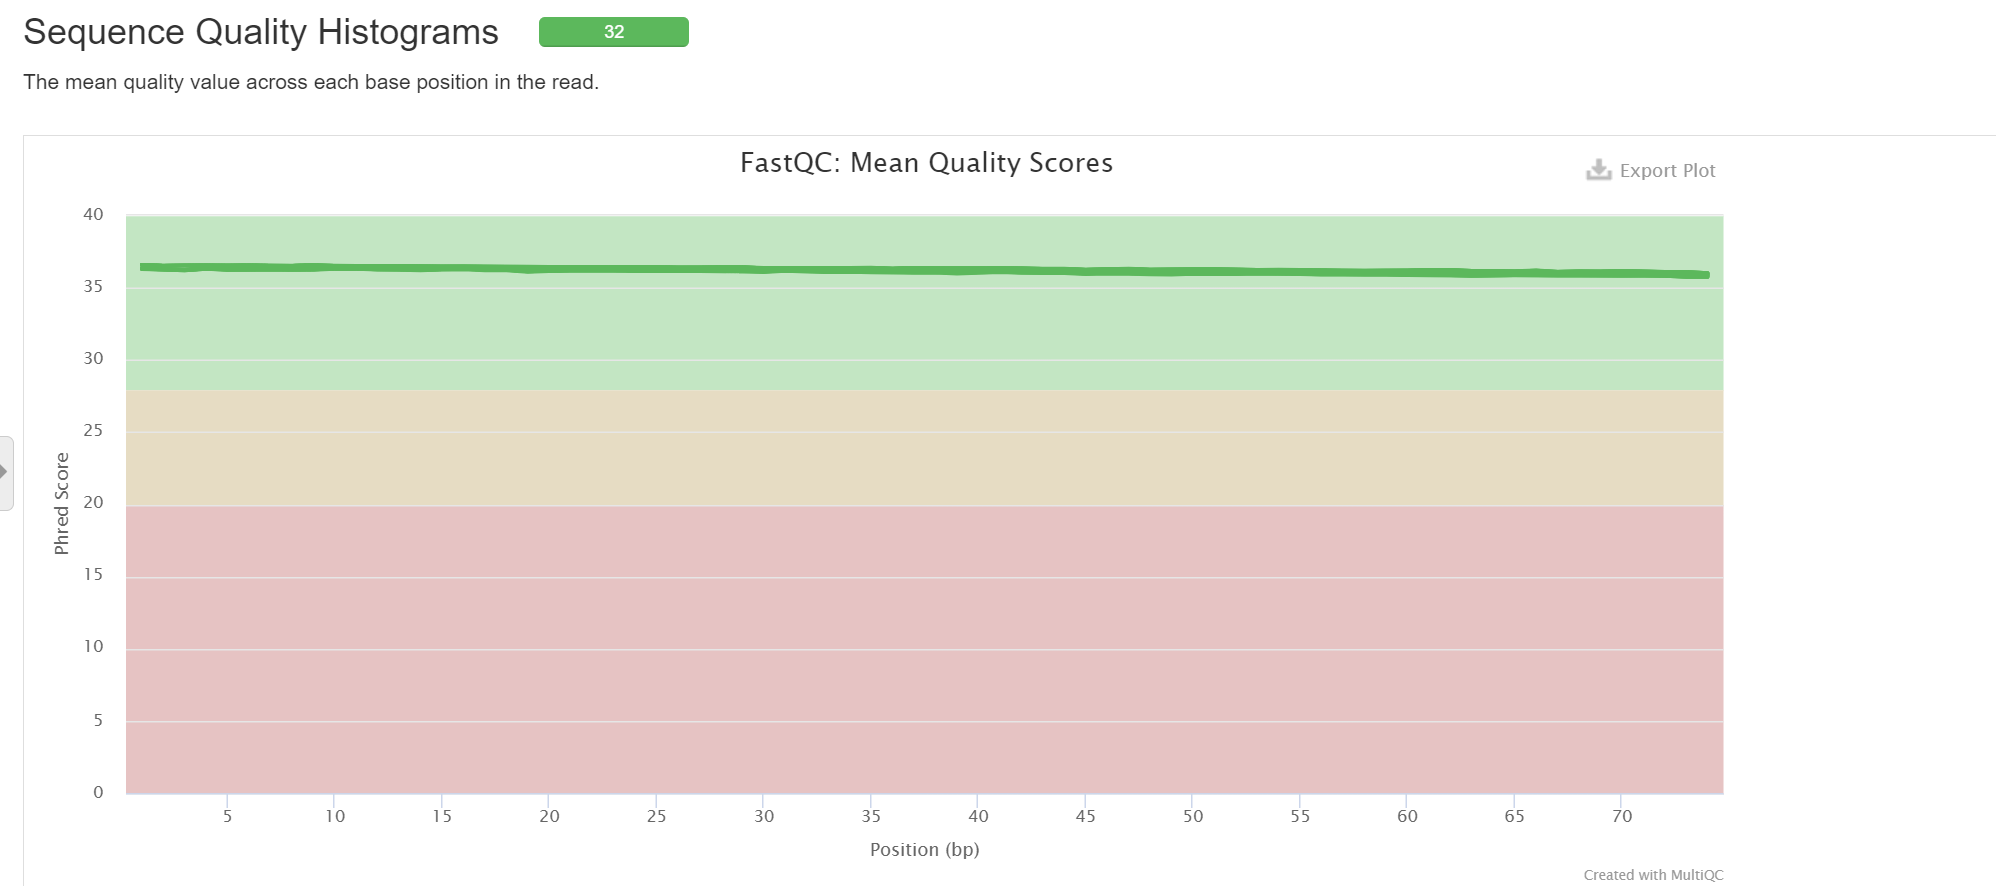

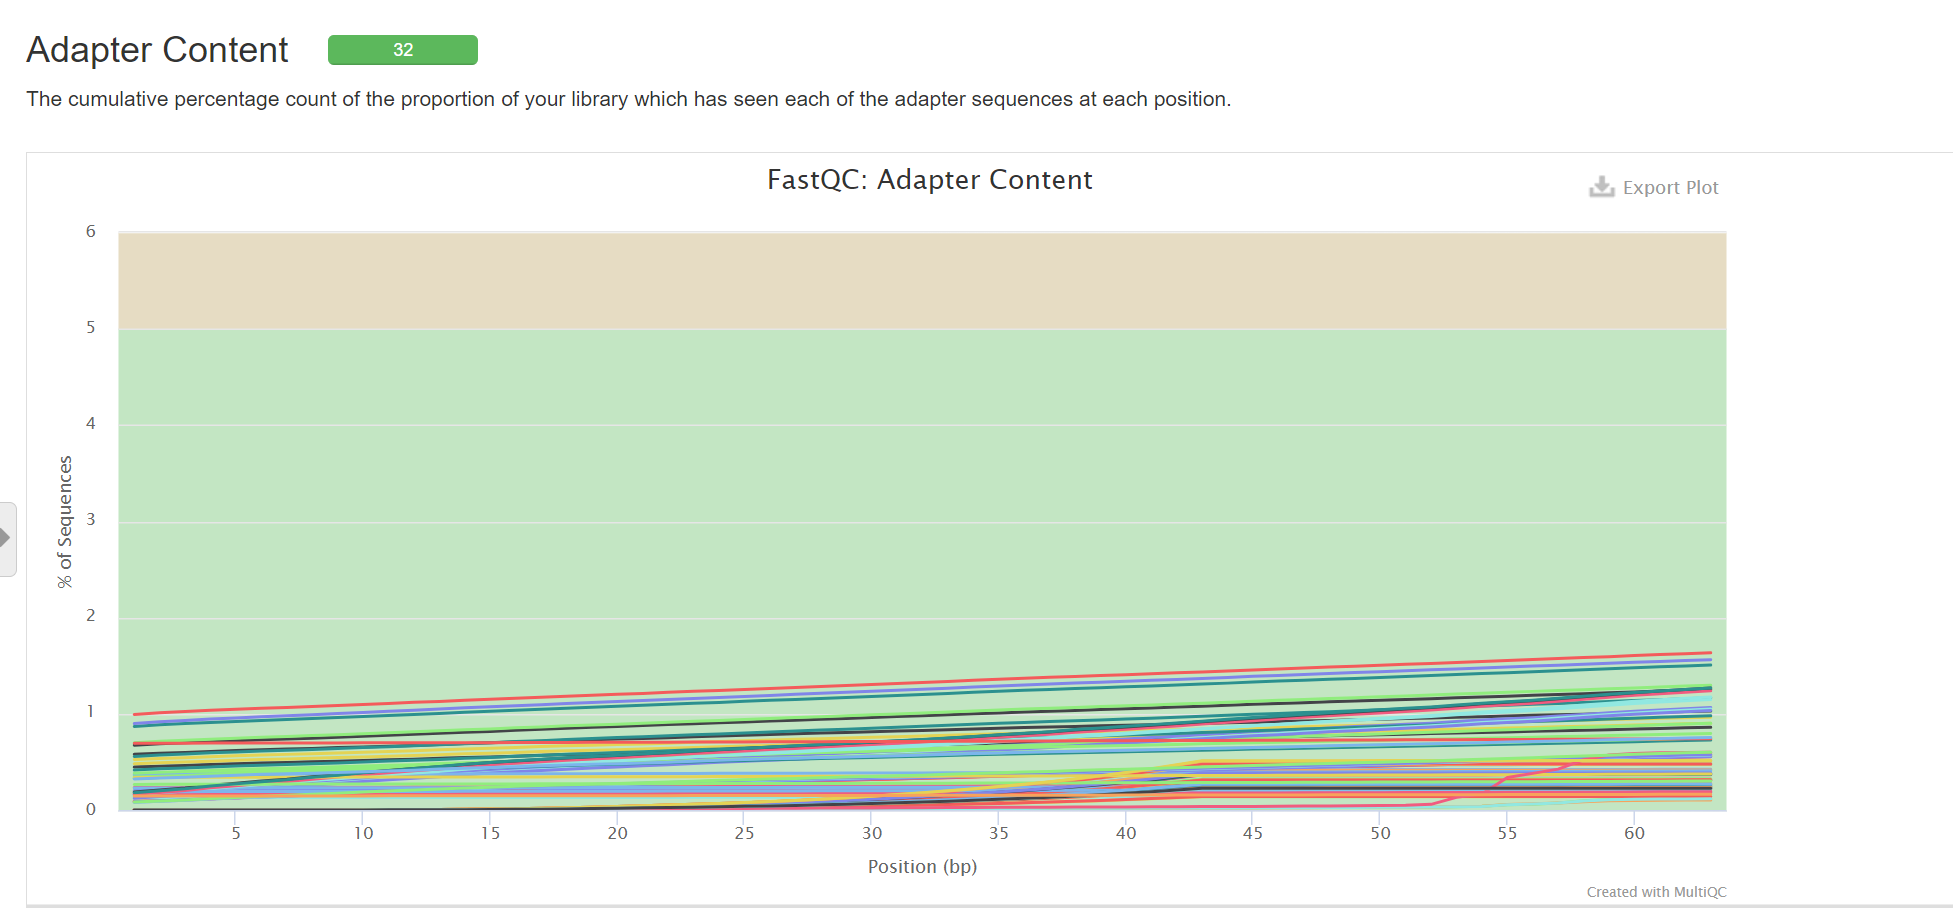

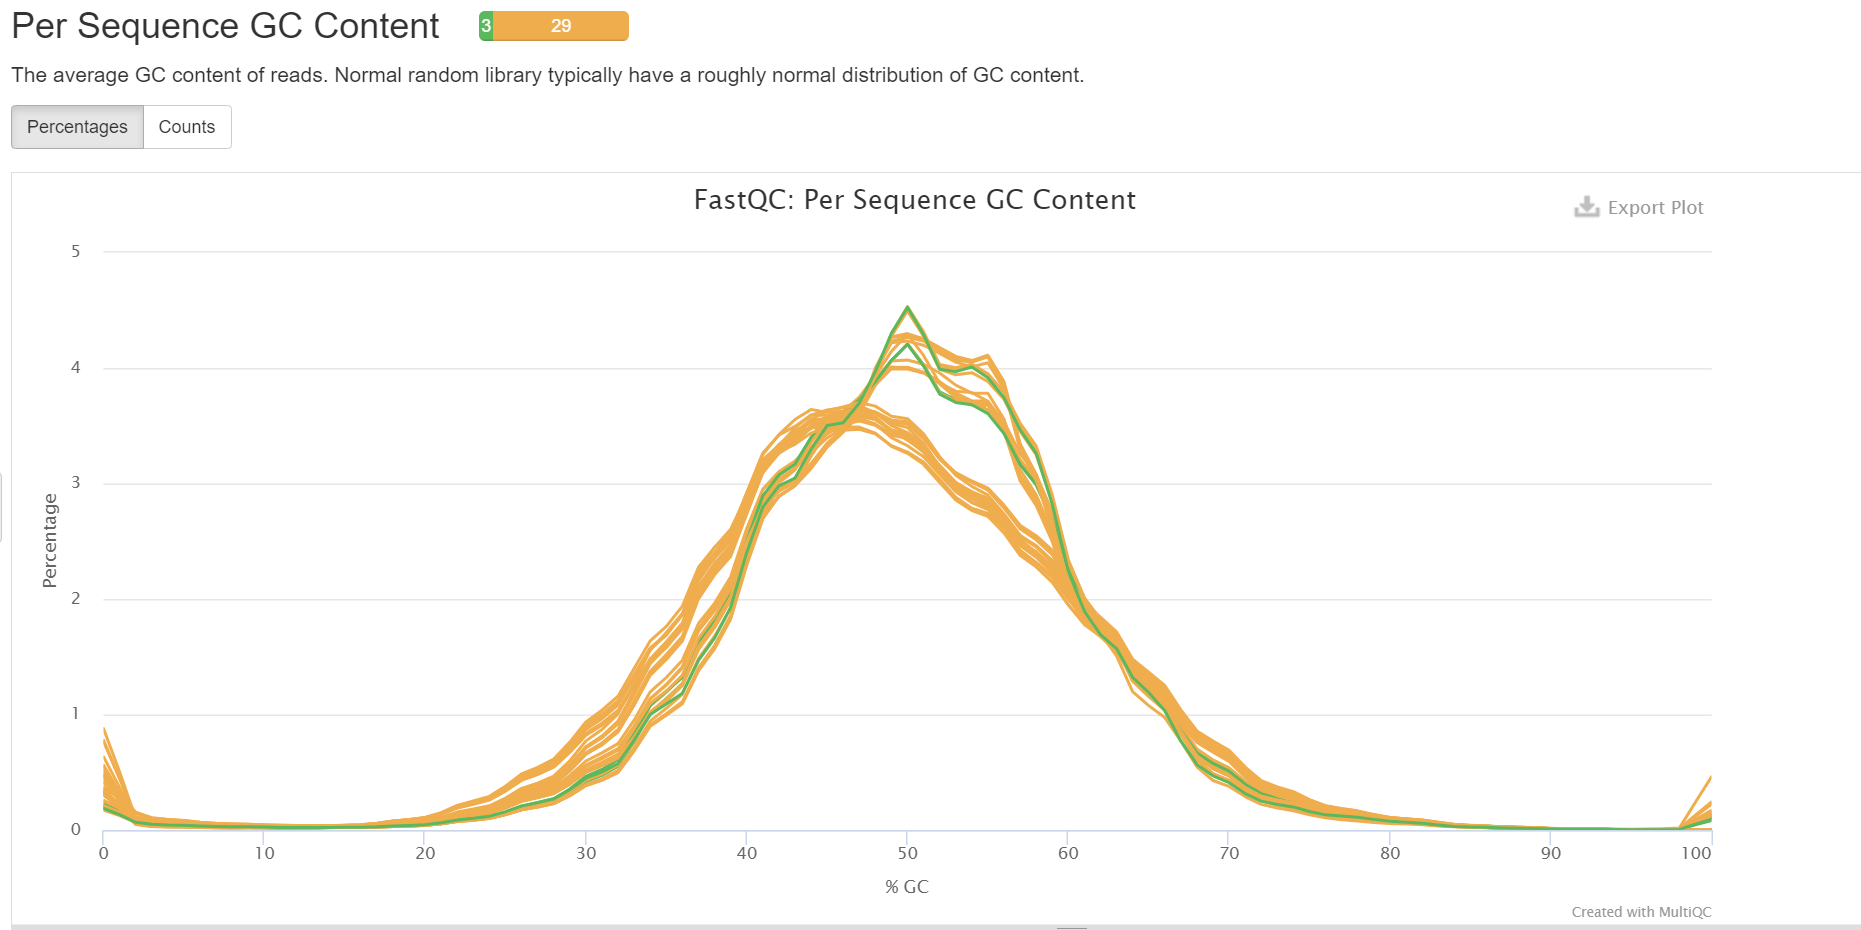

<div class="alert alert-block alert-danger">
    <h2>Remember!</h2>
    <p>The objective of this project is to make a comprehensive guide to RNA-seq + diffrential gene expression analysis. Every step/tool/command etc. that you use, should be justified and documented. Figures are always a plus.</p>
</div>

# **3. RNA-seq analysis**
### *Total Questions: 1*
### *Total Points:  150*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Align and quantify</h3>
    <p>Make sure to talk about the following:</p>
    <p><b>1:</b> Reference files used, where they were downloaded from, their specs etc.</p>
    <p><b>2:</b> The tool(s) you are using. We have Salmon, Kallisto, and Star installed in the environment.</p>
    <p><b>3:</b> Use markdown texts to clearly detail the process of alignment and quantification.</p>
    <p><b>4:</b> Show all the files being produced using bash commands.</p>
    <p><b>5:</b> As always, tool commands should be commented and logs should be displayed.</p>
</div>

In [6]:
### Add cells for commands, comments and important points to keep in mind.

We have taken GRCh38 human reference transcriptome. Avail at NCBI FTP website:
https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/.

Accession#: GCF_000001405.40
https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/README.txt

In [4]:
#creating the dir to download ref transcriptome.
!mkdir /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/reftranscriptome

In [5]:
#downloading the ref transcriptome:
!wget -O /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/reftranscriptome/referenceGRCh38.fna.gz https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/GRCh38_latest_rna.fna.gz

--2023-12-03 01:37:14--  https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/GRCh38_latest_rna.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.11, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135048066 (129M) [application/x-gzip]
Saving to: ‘/home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/reftranscriptome/referenceGRCh38.fna.gz’

/home/hice1/hpatil3 100%[===================>] 128.79M  49.6MB/s    in 2.6s    

2023-12-03 01:37:16 (49.6 MB/s) - ‘/home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/reftranscriptome/referenceGRCh38.fna.gz’ saved [135048066/135048066]



In [6]:
#displaying the reftranscriptome file:
!zcat /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/reftranscriptome/referenceGRCh38.fna.gz | head

#Check the number of sequences in reference file
!zcat /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/reftranscriptome/referenceGRCh38.fna.gz | grep ">" | wc -l

>NM_000014.6 Homo sapiens alpha-2-macroglobulin (A2M), transcript variant 1, mRNA
GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCTCCTCCAGCTCCTTCTTTCTGCAACATGGGGAAGA
ACAAACTCCTTCATCCAAGTCTGGTTCTTCTCCTCTTGGTCCTCCTGCCCACAGACGCCTCAGTCTCTGGAAAACCGCAG
TATATGGTTCTGGTCCCCTCCCTGCTCCACACTGAGACCACTGAGAAGGGCTGTGTCCTTCTGAGCTACCTGAATGAGAC
AGTGACTGTAAGTGCTTCCTTGGAGTCTGTCAGGGGAAACAGGAGCCTCTTCACTGACCTGGAGGCGGAGAATGACGTAC
TCCACTGTGTCGCCTTCGCTGTCCCAAAGTCTTCATCCAATGAGGAGGTAATGTTCCTCACTGTCCAAGTGAAAGGACCA
ACCCAAGAATTTAAGAAGCGGACCACAGTGATGGTTAAGAACGAGGACAGTCTGGTCTTTGTCCAGACAGACAAATCAAT
CTACAAACCAGGGCAGACAGTGAAATTTCGTGTTGTCTCCATGGATGAAAACTTTCACCCCCTGAATGAGTTGATTCCAC
TAGTATACATTCAGGATCCCAAAGGAAATCGCATCGCACAATGGCAGAGTTTCCAGTTAGAGGGTGGCCTCAAGCAATTT
TCTTTTCCCCTCTCATCAGAGCCCTTCCAGGGCTCCTACAAGGTGGTGGTACAGAAGAAATCAGGTGGAAGGACAGAGCA

gzip: stdout: Broken pipe
185121


# TOOL: SALMON

Salmon is a tool used for RNA sequencing analysis. It needs two main inputs: the genetic instructions (transcriptome) and the raw data from the sequencing machine (reads).

Instead of aligning reads one by one, Salmon uses a quick "quasi-mapping" method. This method relies on a pre-made index of the transcriptome, which is like a cheat sheet that helps quickly find where each read likely came from in the genetic instructions. This speeds up the process of figuring out how much of each gene is present in the sample, a key step in RNA-seq analysis.

In [7]:
#salmon indexing 
!salmon index --help

Version Server Response: Not Found

Index
Creates a salmon index.

Command Line Options:
  -v [ --version ]              print version string
  -h [ --help ]                 produce help message
  -t [ --transcripts ] arg      Transcript fasta file.
  -k [ --kmerLen ] arg (=31)    The size of k-mers that should be used for the 
                                quasi index.
  -i [ --index ] arg            salmon index.
  --gencode                     This flag will expect the input transcript 
                                fasta to be in GENCODE format, and will split 
                                the transcript name at the first '|' character.
                                These reduced names will be used in the output 
                                and when looking for these transcripts in a 
                                gene to transcript GTF.
  --features                    This flag will expect the input reference to be
                                in the tsv file for

In [8]:
#Indexing the reftranscriptome file by using Salmon tools.
!salmon index -t /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/reftranscriptome/referenceGRCh38.fna.gz -i ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/index -k 31 -p 30

Version Server Response: Not Found
index ["/home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/index"] did not previously exist  . . . creating it
[2023-12-03 01:49:42.883] [jLog] [warning] The salmon index is being built without any decoy sequences.  It is recommended that decoy sequence (either computed auxiliary decoy sequence or the genome of the organism) be provided during indexing. Further details can be found at https://salmon.readthedocs.io/en/latest/salmon.html#preparing-transcriptome-indices-mapping-based-mode.
[2023-12-03 01:49:42.883] [jLog] [info] building index
out : /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project56/index
[2023-12-03 01:49:42.884] [puff::index::jointLog] [info] Running fixFasta

[Step 1 of 4] : counting k-mers

[2023-12-03 01:50:01.908] [puff::index::jointLog] [warning] Removed 4060 transcripts that were sequence duplicates of indexed transcripts.
[2023-12-03 01:50:01.909] [puff::index::jointLog] [warning] 

[2023-12-03 02:17:47.957] [puff::index::jointLog] [info] finished populating pos vector
[2023-12-03 02:17:47.957] [puff::index::jointLog] [info] writing index components
[2023-12-03 02:17:48.960] [puff::index::jointLog] [info] finished writing dense pufferfish index
[2023-12-03 02:17:49.044] [jLog] [info] done building index


In [11]:
#the files created after indexing the reftranscriptome.
!ls -lh ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/index

total 893M
-rw-r--r-- 1 hpatil39 gtperson 708K Dec  3 01:50 complete_ref_lens.bin
-rw-r--r-- 1 hpatil39 gtperson  91M Dec  3 02:17 ctable.bin
-rw-r--r-- 1 hpatil39 gtperson 2.8M Dec  3 02:17 ctg_offsets.bin
-rw-r--r-- 1 hpatil39 gtperson 117K Dec  3 01:50 duplicate_clusters.tsv
-rw-r--r-- 1 hpatil39 gtperson 1.1K Dec  3 02:17 info.json
-rw-r--r-- 1 hpatil39 gtperson  89M Dec  3 02:17 mphf.bin
-rw-r--r-- 1 hpatil39 gtperson 476M Dec  3 02:17 pos.bin
-rw-r--r-- 1 hpatil39 gtperson  496 Dec  3 02:17 pre_indexing.log
-rw-r--r-- 1 hpatil39 gtperson  21M Dec  3 02:17 rank.bin
-rw-r--r-- 1 hpatil39 gtperson 1.4M Dec  3 02:17 refAccumLengths.bin
-rw-r--r-- 1 hpatil39 gtperson 5.6K Dec  3 02:17 ref_indexing.log
-rw-r--r-- 1 hpatil39 gtperson 708K Dec  3 02:17 reflengths.bin
-rw-r--r-- 1 hpatil39 gtperson 168M Dec  3 02:17 refseq.bin
-rw-r--r-- 1 hpatil39 gtperson  41M Dec  3 02:17 seq.bin
-rw-r--r-- 1 hpatil39 gtperson  127 Dec  3 02:17 versionInfo.json


# RNA Quantification

In [12]:
!salmon quant --help-reads

Version Server Response: Not Found

Quant
Perform dual-phase, selective-alignment-based estimation of
transcript abundance from RNA-seq reads

salmon quant options:


mapping input options:
  -l [ --libType ] arg                  Format string describing the library 
                                        type
  -i [ --index ] arg                    salmon index
  -r [ --unmatedReads ] arg             List of files containing unmated reads 
                                        of (e.g. single-end reads)
  -1 [ --mates1 ] arg                   File containing the #1 mates
  -2 [ --mates2 ] arg                   File containing the #2 mates


basic options:
  -v [ --version ]                      print version string
  -h [ --help ]                         produce help message
  -o [ --output ] arg                   Output quantification directory.
  --seqBias                             Perform sequence-specific bias 
                                        correction.
  --gcBias   

In [1]:
#quantification of all the 16 sample files.
srrlists = ['SRR21696962', 'SRR21696963', 'SRR21696964', 'SRR21696965', 'SRR21696966', 'SRR21696967', 'SRR21696968', 'SRR21696969', 'SRR21696971', 'SRR21696972', 'SRR21696973', 'SRR21696974', 'SRR21696975', 'SRR21696976', 'SRR21696977', 'SRR21696981']
for srrid in srrlists:
    !salmon quant -i ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/index/ -l A -1 ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/Trimming/{srrid}_1.Trimmed.fastq -2 ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/Trimming/{srrid}_2.Trimmed.fastq --validateMappings -o ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/{srrid}_quant -p 30

Version Server Response: Not Found
### salmon (selective-alignment-based) v1.10.2
### [ program ] => salmon 
### [ command ] => quant 
### [ index ] => { /home/hice1/ajaishankar7/biol6150/ProjectSubmissions/Group14-Peaches/Project56/index/ }
### [ libType ] => { A }
### [ mates1 ] => { /home/hice1/ajaishankar7/biol6150/ProjectSubmissions/Group14-Peaches/Project56/Trimming/SRR21696966_1.Trimmed.fastq }
### [ mates2 ] => { /home/hice1/ajaishankar7/biol6150/ProjectSubmissions/Group14-Peaches/Project56/Trimming/SRR21696966_2.Trimmed.fastq }
### [ validateMappings ] => { }
### [ output ] => { /home/hice1/ajaishankar7/biol6150/ProjectSubmissions/Group14-Peaches/Project56/SRR21696966_quant }
### [ threads ] => { 30 }
Logs will be written to /home/hice1/ajaishankar7/biol6150/ProjectSubmissions/Group14-Peaches/Project56/SRR21696966_quant/logs
[2023-12-04 20:34:45.025] [jointLog] [info] setting maxHashResizeThreads to 30
[2023-12-04 20:34:45.025] [jointLog] [info] Fragment incompatibility prior 

[2023-12-04 20:37:16.217] [jointLog] [info] Thread saw mini-batch with a maximum of 2.50% zero probability fragments
[2023-12-04 20:37:16.249] [jointLog] [info] Thread saw mini-batch with a maximum of 2.58% zero probability fragments
[2023-12-04 20:37:16.259] [jointLog] [info] Thread saw mini-batch with a maximum of 2.54% zero probability fragments
[2023-12-04 20:37:16.269] [jointLog] [info] Thread saw mini-batch with a maximum of 2.52% zero probability fragments
[2023-12-04 20:37:16.277] [jointLog] [info] Thread saw mini-batch with a maximum of 2.50% zero probability fragments








TBB Warning: The number of workers is currently limited to 7. The request for 29 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

[2023-12-04 20:37:16.608] [jointLog] [info] Computed 275,315 rich equivalence classes for further processing
[2023-12-04 20:37:16.608] [jointLog] [info] Counted 16,960,187 total reads in the equivalence classes 
[2023-12-

Number of ones: 953276
Number of ones per inventory item: 512
Inventory entries filled: 1862
-----------------------------------------
| Loading contig boundaries | Time = 384.21 ms
-----------------------------------------
size = 171001775
-----------------------------------------
| Loading sequence | Time = 30.867 ms
-----------------------------------------
size = 142403495
-----------------------------------------
| Loading positions | Time = 303.17 ms
-----------------------------------------
size = 703084695
-----------------------------------------
| Loading reference sequence | Time = 103.2 ms
-----------------------------------------
-----------------------------------------
| Loading reference accumulative lengths | Time = 786.22 us
-----------------------------------------
[2023-12-04 20:38:09.589] [jointLog] [info] done
[2023-12-04 20:38:09.627] [jointLog] [info] Index contained 181,061 targets
[2023-12-04 20:38:09.664] [jointLog] [info] Number of decoys : 0




[2023-12-04

[2023-12-04 20:40:50.982] [jointLog] [info] iteration = 100 | max rel diff. = 19.9896
[2023-12-04 20:40:52.882] [jointLog] [info] iteration = 200 | max rel diff. = 11.1541
[2023-12-04 20:40:54.776] [jointLog] [info] iteration = 300 | max rel diff. = 16.2173
[2023-12-04 20:40:56.672] [jointLog] [info] iteration = 400 | max rel diff. = 8.90266
[2023-12-04 20:40:58.567] [jointLog] [info] iteration = 500 | max rel diff. = 16.7897
[2023-12-04 20:41:00.461] [jointLog] [info] iteration = 600 | max rel diff. = 6.11318
[2023-12-04 20:41:02.356] [jointLog] [info] iteration = 700 | max rel diff. = 2.46054
[2023-12-04 20:41:04.254] [jointLog] [info] iteration = 800 | max rel diff. = 5.77479
[2023-12-04 20:41:06.149] [jointLog] [info] iteration = 900 | max rel diff. = 4.13984
[2023-12-04 20:41:08.047] [jointLog] [info] iteration = 1,000 | max rel diff. = 0.249898
[2023-12-04 20:41:09.942] [jointLog] [info] iteration = 1,100 | max rel diff. = 1.53414
[2023-12-04 20:41:11.838] [jointLog] [info] itera

[2023-12-04 20:45:01.704] [jointLog] [info] iteration = 700 | max rel diff. = 2.22785
[2023-12-04 20:45:03.502] [jointLog] [info] iteration = 800 | max rel diff. = 17.8823
[2023-12-04 20:45:05.306] [jointLog] [info] iteration = 900 | max rel diff. = 1.72264
[2023-12-04 20:45:07.108] [jointLog] [info] iteration = 1,000 | max rel diff. = 15.6749
[2023-12-04 20:45:08.908] [jointLog] [info] iteration = 1,100 | max rel diff. = 1.20394
[2023-12-04 20:45:10.708] [jointLog] [info] iteration = 1,200 | max rel diff. = 12.3132
[2023-12-04 20:45:12.506] [jointLog] [info] iteration = 1,300 | max rel diff. = 0.319431
[2023-12-04 20:45:14.307] [jointLog] [info] iteration = 1,400 | max rel diff. = 2.20476
[2023-12-04 20:45:16.106] [jointLog] [info] iteration = 1,500 | max rel diff. = 0.550304
[2023-12-04 20:45:17.909] [jointLog] [info] iteration = 1,600 | max rel diff. = 0.244185
[2023-12-04 20:45:19.706] [jointLog] [info] iteration = 1,700 | max rel diff. = 0.179518
[2023-12-04 20:45:21.505] [jointLo

processed 18,000,000 fragments
processed 18,500,000 fragments
processed 19,000,000 fragments
processed 19,500,000 fragments
processed 20,000,000 fragments
processed 20,500,000 fragments
processed 21,000,000 fragments
processed 21,500,000 fragments
processed 22,000,000 fragments
hits: 86,588,283, hits per frag:  3.95569[2023-12-04 20:47:33.981] [jointLog] [info] Thread saw mini-batch with a maximum of 1.66% zero probability fragments
[2023-12-04 20:47:33.990] [jointLog] [info] Thread saw mini-batch with a maximum of 1.58% zero probability fragments
[2023-12-04 20:47:33.993] [jointLog] [info] Thread saw mini-batch with a maximum of 1.58% zero probability fragments
[2023-12-04 20:47:33.994] [jointLog] [info] Thread saw mini-batch with a maximum of 1.50% zero probability fragments
[2023-12-04 20:47:33.999] [jointLog] [info] Thread saw mini-batch with a maximum of 1.58% zero probability fragments
[2023-12-04 20:47:34.003] [jointLog] [info] Thread saw mini-batch with a maximum of 1.58% zero 

[2023-12-04 20:48:20.566] [jointLog] [info] iteration = 2,700 | max rel diff. = 0.125253
[2023-12-04 20:48:22.081] [jointLog] [info] iteration = 2,800 | max rel diff. = 0.214837
[2023-12-04 20:48:22.808] [jointLog] [info] iteration = 2,849 | max rel diff. = 0.00916652
[2023-12-04 20:48:22.819] [jointLog] [info] Finished optimizer
[2023-12-04 20:48:22.819] [jointLog] [info] writing output 

Version Server Response: Not Found
### salmon (selective-alignment-based) v1.10.2
### [ program ] => salmon 
### [ command ] => quant 
### [ index ] => { /home/hice1/ajaishankar7/biol6150/ProjectSubmissions/Group14-Peaches/Project56/index/ }
### [ libType ] => { A }
### [ mates1 ] => { /home/hice1/ajaishankar7/biol6150/ProjectSubmissions/Group14-Peaches/Project56/Trimming/SRR21696972_1.Trimmed.fastq }
### [ mates2 ] => { /home/hice1/ajaishankar7/biol6150/ProjectSubmissions/Group14-Peaches/Project56/Trimming/SRR21696972_2.Trimmed.fastq }
### [ validateMappings ] => { }
### [ output ] => { /home/hice1/

[2023-12-04 20:52:51.830] [jointLog] [info] iteration = 2,800 | max rel diff. = 0.0339643
[2023-12-04 20:52:53.839] [jointLog] [info] iteration = 2,900 | max rel diff. = 0.0581498
[2023-12-04 20:52:55.841] [jointLog] [info] iteration = 3,000 | max rel diff. = 0.578029
[2023-12-04 20:52:57.839] [jointLog] [info] iteration = 3,100 | max rel diff. = 0.0965308
[2023-12-04 20:52:59.836] [jointLog] [info] iteration = 3,200 | max rel diff. = 0.226179
[2023-12-04 20:53:01.834] [jointLog] [info] iteration = 3,300 | max rel diff. = 0.0844747
[2023-12-04 20:53:03.831] [jointLog] [info] iteration = 3,400 | max rel diff. = 0.135353
[2023-12-04 20:53:05.828] [jointLog] [info] iteration = 3,500 | max rel diff. = 0.104904
[2023-12-04 20:53:07.825] [jointLog] [info] iteration = 3,600 | max rel diff. = 0.156776
[2023-12-04 20:53:09.824] [jointLog] [info] iteration = 3,700 | max rel diff. = 0.0531385
[2023-12-04 20:53:11.840] [jointLog] [info] iteration = 3,800 | max rel diff. = 0.0184671
[2023-12-04 20:

[2023-12-04 20:56:56.280] [jointLog] [info] iteration = 2,300 | max rel diff. = 0.0880839
[2023-12-04 20:56:58.122] [jointLog] [info] iteration = 2,400 | max rel diff. = 0.282857
[2023-12-04 20:56:59.963] [jointLog] [info] iteration = 2,500 | max rel diff. = 0.113326
[2023-12-04 20:57:01.805] [jointLog] [info] iteration = 2,600 | max rel diff. = 0.467195
[2023-12-04 20:57:03.648] [jointLog] [info] iteration = 2,700 | max rel diff. = 0.0469656
[2023-12-04 20:57:05.490] [jointLog] [info] iteration = 2,800 | max rel diff. = 0.246266
[2023-12-04 20:57:07.331] [jointLog] [info] iteration = 2,900 | max rel diff. = 0.0253561
[2023-12-04 20:57:09.172] [jointLog] [info] iteration = 3,000 | max rel diff. = 0.125323
[2023-12-04 20:57:11.018] [jointLog] [info] iteration = 3,100 | max rel diff. = 0.417467
[2023-12-04 20:57:12.864] [jointLog] [info] iteration = 3,200 | max rel diff. = 2.28084
[2023-12-04 20:57:14.707] [jointLog] [info] iteration = 3,300 | max rel diff. = 0.0596023
[2023-12-04 20:57:

[2023-12-04 21:02:18.594] [jointLog] [info] iteration = 2,400 | max rel diff. = 0.3176
[2023-12-04 21:02:20.687] [jointLog] [info] iteration = 2,500 | max rel diff. = 0.720306
[2023-12-04 21:02:22.793] [jointLog] [info] iteration = 2,600 | max rel diff. = 0.0652082
[2023-12-04 21:02:24.891] [jointLog] [info] iteration = 2,700 | max rel diff. = 0.469503
[2023-12-04 21:02:26.990] [jointLog] [info] iteration = 2,800 | max rel diff. = 0.0801249
[2023-12-04 21:02:29.090] [jointLog] [info] iteration = 2,900 | max rel diff. = 0.661427
[2023-12-04 21:02:31.188] [jointLog] [info] iteration = 3,000 | max rel diff. = 0.100981
[2023-12-04 21:02:33.289] [jointLog] [info] iteration = 3,100 | max rel diff. = 0.176958
[2023-12-04 21:02:35.385] [jointLog] [info] iteration = 3,200 | max rel diff. = 0.0539771
[2023-12-04 21:02:37.484] [jointLog] [info] iteration = 3,300 | max rel diff. = 0.115303
[2023-12-04 21:02:39.580] [jointLog] [info] iteration = 3,400 | max rel diff. = 0.0646865
[2023-12-04 21:02:4

[2023-12-04 21:04:11.265] [jointLog] [info] Thread saw mini-batch with a maximum of 2.44% zero probability fragments
[2023-12-04 21:04:11.299] [jointLog] [info] Thread saw mini-batch with a maximum of 2.24% zero probability fragments
[2023-12-04 21:04:11.320] [jointLog] [info] Thread saw mini-batch with a maximum of 2.40% zero probability fragments
[2023-12-04 21:04:11.331] [jointLog] [info] Thread saw mini-batch with a maximum of 2.32% zero probability fragments
[2023-12-04 21:04:11.342] [jointLog] [info] Thread saw mini-batch with a maximum of 2.38% zero probability fragments
[2023-12-04 21:04:11.346] [jointLog] [info] Thread saw mini-batch with a maximum of 2.40% zero probability fragments
[2023-12-04 21:04:11.349] [jointLog] [info] Thread saw mini-batch with a maximum of 2.36% zero probability fragments
[2023-12-04 21:04:11.353] [jointLog] [info] Thread saw mini-batch with a maximum of 2.30% zero probability fragments
[2023-12-04 21:04:11.367] [jointLog] [info] Thread saw mini-batc

Number of ones: 953276
Number of ones per inventory item: 512
Inventory entries filled: 1862
-----------------------------------------
| Loading contig boundaries | Time = 383.57 ms
-----------------------------------------
size = 171001775
-----------------------------------------
| Loading sequence | Time = 37.081 ms
-----------------------------------------
size = 142403495
-----------------------------------------
| Loading positions | Time = 319.83 ms
-----------------------------------------
size = 703084695
-----------------------------------------
| Loading reference sequence | Time = 114.39 ms
-----------------------------------------
-----------------------------------------
| Loading reference accumulative lengths | Time = 776.18 us
-----------------------------------------
[2023-12-04 21:04:51.988] [jointLog] [info] done
[2023-12-04 21:04:52.028] [jointLog] [info] Index contained 181,061 targets
[2023-12-04 21:04:52.065] [jointLog] [info] Number of decoys : 0




[2023-12-0









TBB Warning: The number of workers is currently limited to 7. The request for 29 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

[2023-12-04 21:08:26.127] [jointLog] [info] Computed 309,229 rich equivalence classes for further processing
[2023-12-04 21:08:26.127] [jointLog] [info] Counted 23,349,764 total reads in the equivalence classes 
[2023-12-04 21:08:26.151] [jointLog] [info] Number of mappings discarded because of alignment score : 93,850,674
[2023-12-04 21:08:26.151] [jointLog] [info] Number of fragments entirely discarded because of alignment score : 1,532,986
[2023-12-04 21:08:26.151] [jointLog] [info] Number of fragments discarded because they are best-mapped to decoys : 0
[2023-12-04 21:08:26.151] [jointLog] [info] Number of fragments discarded because they have only dovetail (discordant) mappings to valid targets : 1,317,047
[2023-12-04 21:08:26.151] [jointLog] [info] Mapping rate = 70.8825%

[2023-12-04 21:0

Number of ones: 953276
Number of ones per inventory item: 512
Inventory entries filled: 1862
-----------------------------------------
| Loading contig boundaries | Time = 387.18 ms
-----------------------------------------
size = 171001775
-----------------------------------------
| Loading sequence | Time = 28.686 ms
-----------------------------------------
size = 142403495
-----------------------------------------
| Loading positions | Time = 322.41 ms
-----------------------------------------
size = 703084695
-----------------------------------------
| Loading reference sequence | Time = 112.89 ms
-----------------------------------------
-----------------------------------------
| Loading reference accumulative lengths | Time = 782.14 us
-----------------------------------------
[2023-12-04 21:09:58.355] [jointLog] [info] done
[2023-12-04 21:09:58.397] [jointLog] [info] Index contained 181,061 targets
[2023-12-04 21:09:58.435] [jointLog] [info] Number of decoys : 0




[2023-12-0

[2023-12-04 21:12:33.304] [jointLog] [info] iteration = 100 | max rel diff. = 19.4488
[2023-12-04 21:12:35.023] [jointLog] [info] iteration = 200 | max rel diff. = 20.315
[2023-12-04 21:12:36.739] [jointLog] [info] iteration = 300 | max rel diff. = 15.5929
[2023-12-04 21:12:38.456] [jointLog] [info] iteration = 400 | max rel diff. = 14.5385
[2023-12-04 21:12:40.173] [jointLog] [info] iteration = 500 | max rel diff. = 3.40734
[2023-12-04 21:12:41.890] [jointLog] [info] iteration = 600 | max rel diff. = 4.41317
[2023-12-04 21:12:43.606] [jointLog] [info] iteration = 700 | max rel diff. = 2.72484
[2023-12-04 21:12:45.323] [jointLog] [info] iteration = 800 | max rel diff. = 2.36385
[2023-12-04 21:12:47.038] [jointLog] [info] iteration = 900 | max rel diff. = 1.47743
[2023-12-04 21:12:48.751] [jointLog] [info] iteration = 1,000 | max rel diff. = 4.33214
[2023-12-04 21:12:50.466] [jointLog] [info] iteration = 1,100 | max rel diff. = 2.61893
[2023-12-04 21:12:52.181] [jointLog] [info] iterati

[2023-12-04 21:15:54.038] [jointLog] [info] iteration = 2,700 | max rel diff. = 0.139382
[2023-12-04 21:15:55.644] [jointLog] [info] iteration = 2,800 | max rel diff. = 0.0208864
[2023-12-04 21:15:57.249] [jointLog] [info] iteration = 2,900 | max rel diff. = 0.0940471
[2023-12-04 21:15:58.853] [jointLog] [info] iteration = 3,000 | max rel diff. = 2.91704
[2023-12-04 21:16:00.462] [jointLog] [info] iteration = 3,100 | max rel diff. = 0.0569019
[2023-12-04 21:16:02.072] [jointLog] [info] iteration = 3,200 | max rel diff. = 0.0643322
[2023-12-04 21:16:03.680] [jointLog] [info] iteration = 3,300 | max rel diff. = 0.116934
[2023-12-04 21:16:05.286] [jointLog] [info] iteration = 3,400 | max rel diff. = 0.126679
[2023-12-04 21:16:06.137] [jointLog] [info] iteration = 3,454 | max rel diff. = 0.0059846
[2023-12-04 21:16:06.148] [jointLog] [info] Finished optimizer
[2023-12-04 21:16:06.148] [jointLog] [info] writing output 



In [5]:
#listing the output we have got for ref_quant.
!ls -lh ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/quanted

#listing the output for quant.sf and #listing the output for quant.sf -l (one sample "SRR21696962_quant")
!head ~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/quanted/SRR21696962_quant/quant.sf 

total 64K
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 20:13 SRR21696962_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 20:21 SRR21696963_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 20:24 SRR21696964_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 20:30 SRR21696965_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 20:56 SRR21696966_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 20:35 SRR21696967_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 20:56 SRR21696968_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 20:56 SRR21696969_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 20:56 SRR21696971_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 20:56 SRR21696972_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 21:02 SRR21696973_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 21:05 SRR21696974_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 21:05 SRR21696975_quant
drwxr-xr-x 5 ajaishankar7 gtperson 4.0K Dec  4 21:11 SRR21696976_qu

# **4. Diffrential gene expression**
### *Total Questions: 1*
### *Total Points: 150*


---

<div class="alert alert-block alert-warning">
    <h3>4.1 Analysis</h3>
    <p>Use the tools of your choice. Python based DeSeq2 code can go in this notebook, and R code can be implemented on the RStudion on Pace-ICE. Make sure to clearly explain (in this notebook) what and how your analysis is performed.</p>
    <p><b>Note:</b> If you use Pace-ICE RStudio for this analysis, then make sure to submit that script separately. Please name the script <b><u>DiffrentialGeneExpression.R</u></b> and keep it next to this notebook in the directory structure. You can still put some description of that script here.</p>
    <hr>
    <p><b>A good solution:</b> Although not necessary, but you can check if your RScript can take arguments. By doing this, you will be able to use your RScript as a command line tool and call it from this notebook. This ensures automation and the command to run diffrential gene expression would be the same for 20 vs 2000 files.</p>
    
</div>

In [ ]:
### Add cells for commands, comments and important points to keep in mind.

To initiate the DESeq2 analysis in Python, start by installing the PyDESeq2 package. The analysis, originally conducted in RStudio using the "DifferentialGeneExpression.R" script located in the "Project5and6" directory, utilized the GRCh38 reference transcript database from the provided reference data file.

Begin by generating a transcript-level quantification object from the Salmon files, extracting counts from "txi.salmon." Utilize sample names as column headers, and designate two condition groups, namely Control and HD (Huntington Disease).

In [1]:
!pip install pydeseq2

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pydeseq2 from https://files.pythonhosted.org/packages/92/da/6e68bb0c0b5287334d0f8af43c3f8da610b9a0f500f94c665e475469c2d2/pydeseq2-0.4.3-py3-none-any.whl.metadata
  Obtaining dependency information for anndata>=0.8.0 from https://files.pythonhosted.org/packages/8a/87/201514af3bf08db52e11b7d94e6129f0a75503194b81614ff48883101c4c/anndata-0.10.3-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.1.0 from https://files.pythonhosted.org/packages/0c/2a/d3ff6091406bc2207e0adb832ebd15e40ac685811c7e2e3b432bfd969b71/scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.2 MB/s eta 0:00:0000:010:01
  Obtaining dependency information for array-api-compat from https://files.pythonhosted.org/packages/10/cf/040c1b046fd43c02d230295e93969c7d100a4c34f4b1ccfaffdf98ef453

install.packages("BiocManager")
library(BiocManager)

BiocManager::install(c('tximportData', 'tximport', 'DESeq2', 'GenomicFeatures'), force = TRUE)

install.packages(c(
  "readr",
  "dplyr",
  "ggplot2",
  "apeglm"
))

library("tximportData")
library("tximport")
library("readr")
library("DESeq2")
library("dplyr")
library("GenomicFeatures")
library("ggplot2")
library("apeglm") 

# Use transcript database from GRCh38 Genome Reference, read tx2gene
tx2gene <- readr::read_csv("~/biol6150/Data/DiffrentialExpression/Reference/tx2gene.RefSeq.All.tsv") %>% as.data.frame()
head(tx2gene)

# Read samples map file
samples <- c('SRR21696962_quant','SRR21696963_quant','SRR21696964_quant','SRR21696965_quant','SRR21696966_quant','SRR21696967_quant','SRR21696968_quant', 'SRR21696969_quant', 'SRR21696971_quant', 'SRR21696972_quant', 'SRR21696973_quant', 'SRR21696974_quant', 'SRR21696975_quant', 'SRR21696976_quant', 'SRR21696977_quant', 'SRR21696981_quant')
print(samples)

file_paths <- paste0("~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/quanted/", samples , "/quant.sf")
print(file_paths)

# Check if files exist
files <- file_paths
print(files)
print(all(file.exists(files)))

# Create txi object and read salmon SF files
txi.salmon <- tximport(file_paths, type = "salmon", txOut = TRUE, tx2gene = tx2gene)

#file_paths <- paste0("~/biol6150/ProjectSubmissions/Group14-Peaches/Project56/quanted/", samples, "/quant.sf")
#print(file_paths)

# Create txi object and read salmon SF files
#txi.salmon <- tximport(file_paths, type = "salmon", txOut = TRUE, tx2gene = tx2gene)
#print(head(txi.salmon$counts))

# Get correct format for DESeq2
counts_matrix <- txi.salmon$counts

# Convert the matrix to a data frame
counts_df <- as.data.frame(counts_matrix)

# Assign column names to the data frame
colnames(counts_df) <- samples

# Define conditions for Huntington's disease
sampleTable <- data.frame(condition = factor(c(rep("HD", 8), rep("Control", 8))))
length(samples)
rownames(sampleTable) <- colnames(counts_df)
sampleTable

# Create dds object
dds <- DESeqDataSetFromTximport(txi.salmon, colData = sampleTable, design = ~condition)

# Run DESeq
dds <- DESeq(dds)

# Get differential expression
results <- results(dds)
head(results)

# Check number of transcripts passing filter
table(results$padj < 0.05)

# Order by adjusted p-value
results <- results[order(results$padj), ]
head(results)

# Visualization of Results
results <- as.data.frame(results)

ggplot(results, aes(x = log2FoldChange, y = -log10(padj))) + 
  geom_point(pch = 21, fill = "magenta") + theme_bw(base_size = 24)

# Significant Results
sig_results <- results %>% filter(padj < 0.05)
dim(sig_results)
head(sig_results)

# Volcano Plot for Significant Results
ggplot(sig_results, aes(x = log2FoldChange, y = -log10(padj))) + 
  geom_point(pch = 21, fill = "magenta") + ylim(c(0, 20)) + xlim(c(-15, 15)) +
  theme_bw(base_size = 24)

# Visualize differences between top 2 genes
top2_genes <- head(rownames(sig_results), 2)

# Extract normalized counts for the selected transcripts
normalized_counts <- counts(dds, normalized = TRUE)
normalized_counts_top2 <- normalized_counts[top2_genes, ]

# Create a boxplot or points plot to visualize differences
par(mfrow = c(1, 2))

# Boxplot for the first transcript
boxplot(normalized_counts_top2[1, ] ~ sampleTable$condition, 
        main = paste("Transcript: ", top2_genes[1]),
        xlab = "Condition", ylab = "Normalized Counts")

# Boxplot for the second transcript
boxplot(normalized_counts_top2[2, ] ~ sampleTable$condition, 
        main = paste("Transcript: ", top2_genes[2]),
        xlab = "Condition", ylab = "Normalized Counts")



This R code performs a comprehensive analysis of RNA-seq data for the identification of differentially expressed genes associated with Huntington's disease. It begins by installing and loading essential R packages, including those for handling genomics data and conducting differential expression analysis. The code reads data of transcript-to-gene mapping file and defining sample names and file paths for the RNA-seq quantification files. After ensuring the existence of these files, the code utilizes the tximport package to import and process transcript-level quantification data generated by Salmon.

The analysis continues with the application of DESeq2, a widely-used tool for detecting differential expression in RNA-seq datasets. Experimental conditions, distinguishing between Huntington's disease and control samples, are defined, and DESeq2 is employed to identify significant differences in gene expression. The results are visualized through informative plots, including a volcano plot and scatter plot, providing a clear representation of the differentially expressed genes. The code also investigates the top two genes by creating boxplots to visualize the normalized expression counts across experimental conditions.

# **5. Summarize and visualize**
### *Total Questions: 3*
### *Total Points: 30+35+35+50(bonus) = 100*


---

<div class="alert alert-block alert-warning">
    <h3>5.1 Summarize you findings</h3>
    <p>Use bash commands to show your DeSeq2 results. Filter for different p-value thresholds and report your findings. Quickly check if the genes reported in the source study are also found as diffrentially expressed in your analysis.</p>
</div>

In [ ]:
### Add cells for commands, comments and important points to keep in mind.

The initial analysis was carried out in R. Below are the screenshots of the relevant R commands and file outputs for reference. This visual representation will serve as a guide for executing the same steps in Python, ensuring a smooth transition while preserving the integrity of the analysis.

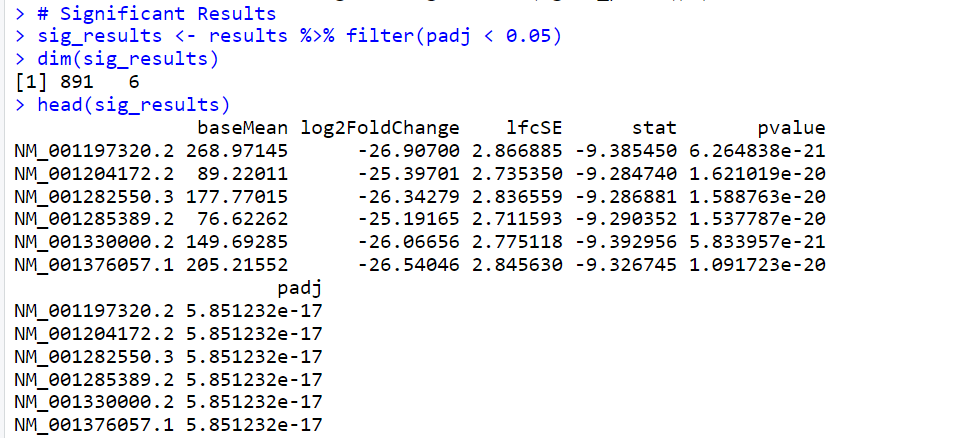

We have Filtered the p-values less than 0.05

<div class="alert alert-block alert-warning">
    <h3>5.2 Volcano plots</h3>
    <p>Visualize your diffrentailly expressed transcripts using a volcano plot and annotate the transcripts of interest.</p>
</div>

In [ ]:
### Add cells for commands, comments and important points to keep in mind.

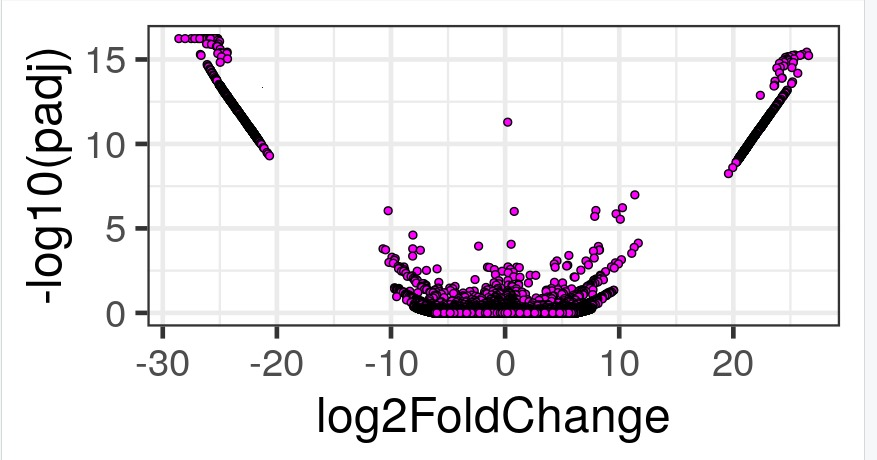

Unfiltered results analysis positions of Control vs HD

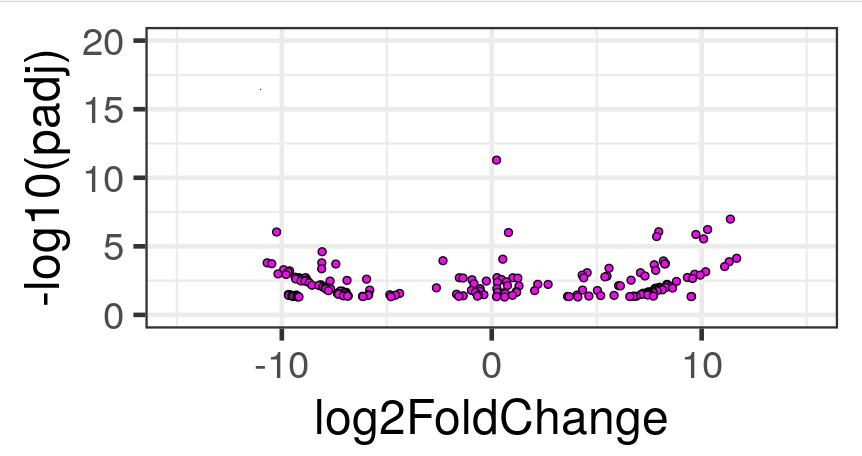

Filtered results analysis positions of Control vs HD

<div class="alert alert-block alert-warning">
    <h3>5.3 Top findings</h3>
    <p>Select 2 differentially expressed transcripts with lowest p-value. Using box plots or points, show that the normalized counts (that you got from Salmon or other tools) are actually different between cases and controls.</p>
</div>

In [7]:
### Add cells for commands, comments and important points to keep in mind.

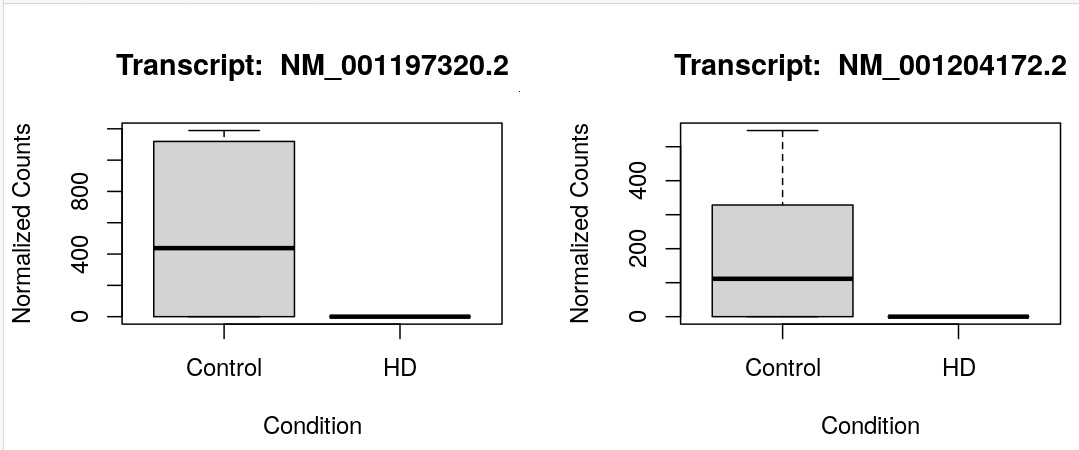

In [ ]:
# Visualize differences between top 2 genes
top2_genes <- head(rownames(sig_results), 2)

# Extract normalized counts for the selected transcripts
normalized_counts <- counts(dds, normalized = TRUE)
normalized_counts_top2 <- normalized_counts[top2_genes, ]

# Create a boxplot or points plot to visualize differences
par(mfrow = c(1, 2))

# Boxplot for the first transcript
boxplot(normalized_counts_top2[1, ] ~ sampleTable$condition, 
        main = paste("Transcript: ", top2_genes[1]),
        xlab = "Condition", ylab = "Normalized Counts")

# Boxplot for the second transcript
boxplot(normalized_counts_top2[2, ] ~ sampleTable$condition, 
        main = paste("Transcript: ", top2_genes[2]),
        xlab = "Condition", ylab = "Normalized Counts")

This R code is designed to create visualizations illustrating the differences in normalized counts for the top two genes identified in a differential expression analysis. The variable top2_genes is assigned the names of these top genes, determined based on their significance in the analysis results. The code then extracts the normalized counts for these selected genes from the DESeqDataSet object (dds) using the counts function with the normalized parameter set to TRUE.

The subsequent step involves generating side-by-side boxplots to visually compare the distribution of normalized counts for each gene across different experimental conditions. The command par(mfrow = c(1, 2)) sets up a 1x2 plotting layout, allowing for a clear comparison. The first boxplot illustrates the normalized counts for the first gene across various conditions as specified in sampleTable$condition. The main title and axis labels offer key information about the plotted data. The same structure is then repeated for the second gene in the second boxplot.

In summary, this code effectively produces visual representations that highlight the expression differences of the top two genes by showcasing their normalized counts across diverse experimental conditions. These visualizations contribute to a better understanding of the biological significance of these genes within the context of the studied conditions.

<div class="alert alert-block alert-warning">
    <h3>5.4 Bonus Question</h3>
    <p>Look into how else you could represent your findings. Heatmaps? PCA? Something else? Make 1 or 2 figures for some extra points.</p>
</div>

In [ ]:
### Add cells for commands, comments and important points to keep in mind.

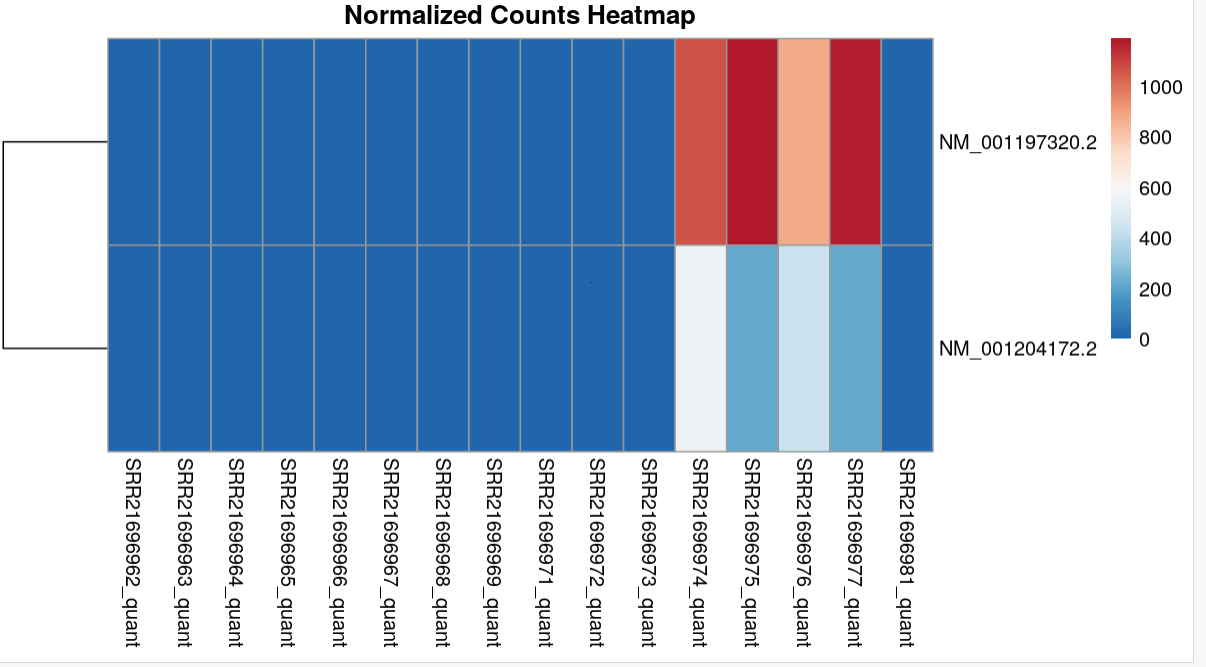

# Install required packages if not already installed
install.packages(c("pheatmap", "RColorBrewer"))

# Load libraries
library(pheatmap)
library(RColorBrewer)

# Heatmap
heatmap_data <- normalized_counts_top2

# Set color palette
colors <- colorRampPalette(rev(brewer.pal(9, "RdBu")))(100)

# Generate heatmap
pheatmap(heatmap_data, 
         color = colors,
         main = "Normalized Counts Heatmap",
         cluster_rows = TRUE, cluster_cols = FALSE)

# Filter out constant columns
non_constant_cols <- apply(normalized_counts, 2, function(x) length(unique(x)) > 1)
filtered_counts <- normalized_counts[, non_constant_cols]

This code makes a color indicating - heatmap to show how the top two genes behave in different conditions. It uses colors to represent the gene activity levels. The map helps see if genes are more or less active under certain conditions.
Additionally, the code removes any unchanging parts from the map to keep it focused on the interesting variations